<a href="https://colab.research.google.com/github/apechow/cs189/blob/main/hw4_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## IMPORTANT: On Colab, we expect your homework to be in the cs189 folder
## Please contact staff if you encounter any problems with installing dependencies
import sys
IS_COLAB = 'google.colab' in sys.modules
if IS_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/cs189/hw/hw4
    %pip install -r ./requirements.txt
    !pip install -U kaleido plotly
    import kaleido
    kaleido.get_chrome_sync()

import plotly.io as pio
pio.renderers.default = pio.renderers.default + "+png"

# Last updated: 2025-11-09 13:21:35

Mounted at /content/drive
/content/drive/MyDrive/cs189/hw/hw4
  Cloning https://github.com/BerkeleyML/otter-grader-189.git (to revision master) to /tmp/pip-install-emn2yjfr/otter-grader_f83bc6b7289c44c7a5cc6550c4045027
  Running command git clone --filter=blob:none --quiet https://github.com/BerkeleyML/otter-grader-189.git /tmp/pip-install-emn2yjfr/otter-grader_f83bc6b7289c44c7a5cc6550c4045027
  Resolved https://github.com/BerkeleyML/otter-grader-189.git to commit 35e43fdf64a55f4b9222d7b531890fb7d5cb498c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw4_part2.ipynb")

# Homework 4.2

The limit of what's possible is constantly being redefined in the world of AI and ML. Researcher, engineers, and curious scholars just like me and you have invented creative ways to apply machine learning everywhere! In this homework, we're going to explore how the ideas behind transformers and convolutional neural networks can solve problems in unconventional ways---and hopefully inspire you to experiment in out-of-the-box ways on your own too.

Vision models (CNNs, ResNets) take in images as input, where the images are represented by multi-dimensional arrays of pixel values. Transformers take in *tokens* as input, where each chunk of the data is encoded into a number. Vision Transformers apply this same idea to images by encoding *patches* of images into tokens.

A key idea we hope you take away from this homework is how incredibly versatile machine learning can be. Machine learning models love to work with numbers---matrices, vectors, and tensors---so as long as we can represent our data as a number in some way, we can hope that our models can learn something meaningful from them!

---

## Due Date: Friday, November 28, 11:59 PM

This assignment is due on **Friday, November 28, at 11:59 PM**. You must submit your work to Gradescope by this deadline. Please refer to the syllabus for the [Slip Day policy](https://eecs189.org/fa25/syllabus/#slip-days). No late submissions will be accepted beyond the details outlined in the Slip Day policy.


**Start early! You only have a limited number of Kaggle submissions per day.**

## Deliverables:
* Homework 4.2 consists of coding questions and **2 Kaggle competition submissions**.
* Code [PDF]:
    * Please submit a **PDF** of your coding notebook to the `HW 4.2 Coding [PDF]` assignment on Gradescope.
    * Please tag the pages in your PDF to the corresponding questions on Gradescope.
    * In addition to the code from your notebook, make sure you include a screenshot of your **scores to the 2 Kaggle competitions** and your **Kaggle username**.
* Code [Notebook]:
    * Please submit the zip file generated by the final export cell in this coding notebook to the `HW 4.2 Coding [Code]` assignment on Gradescope.
    * Code submitted in your notebook must match the code in your PDF submission, and produce the *exact* same outputs if re-run by course staff. Inconsistent or incomplete code might not receive marks.
* Kaggle Competition Submissions:
    * Submit your predictions for 2 Kaggle competitions.
        * [Fa25 CS189 HW 4 - DNABERT](https://www.kaggle.com/competitions/fa-25-cs-189-hw-4-competition/overview)
        * [Fa25 CS189 HW4 - UrbanSound8k](https://www.kaggle.com/competitions/fa-25-cs-189-hw-4-urban-sounds-8-k/overview)
    * Include your **Kaggle username** and a screenshot of your **Kaggle scores** in your PDF submission.
* Note: Make sure you submit *both* a PDF version of your notebook (to the Coding [PDF] assignment) and a zip file of the notebook (to the Coding [Code] assignment) on Gradescope.

### Submission Tips:
- **Plan ahead:** We strongly encourage you to submit your work several hours before the deadline. This will give you ample time to address any submission issues.
- **Reach out for help early:** If you encounter difficulties, contact course staff well before the deadline. While we are happy to assist with submission issues, we cannot guarantee responses to last-minute requests.
- **Checkpoints:** The two subparts are independent of each other. If you only want to work on subpart 2 in a separate sitting, all you need to do is run the otter setup cell, Colab initialization cell, import cell, and seed setting cell before going directly to subpart 2.

---

## Assignment Overview

This notebook contains a series of tasks designed to help you practice and apply key concepts in data manipulation and visualization. You will complete all the TODOs in the notebook, which include both coding and written response questions. Some tasks are open-ended, which allows you to explore and experiment with different approaches.

### Key Learning Objectives:
1. Gain familiarity with bi-directional encoders and ConvNext architectures
2. Implement custom tokenizers and datasets for data of different modalities (text, images, and sound)
3. Practice writing your own training loops and analyzing training performance
4. Learn how to add classification layers to different architectures
5. Learn how to load, freeze, and finetune pre-trained models

---

<div align="center">

### Grading Breakdown
| Question | Points |
|----------|--------|
| 4a       | 2      |
| 4b       | 1      |
| 4c       | 2      |
| 4d       | 2      |
| 4e       | 2      |
| 4f       | 3      |
| 4g       | 4      |
| 4h       | 1      |
| 4i (Kaggle) | 3      |
| 5a       | 3      |
| 5b       | 2      |
| 5c       | 3      |
| 5d       | 1      |
| 5e       | 3      |
| 5f       | 3      |
| 5g       | 3      |
| 5h       | 2      |
| 5i       | 2      |
| 5j (Kaggle) | 3      |
| **Total**| **45** |

</div>

---

### Instructions:
1. Carefully read each question and its requirements.
2. Complete all TODOs in the notebook. You may add extra lines of code if needed to implement your solution.
3. For manual questions, provide clear and concise written responses.
4. Test your code thoroughly to ensure it meets the requirements.

Good luck! Autobots, roll out! 🤖

In [ ]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objects
import plotly.subplots
import torch
import torch.nn as nn
from torch.optim import AdamW
import torchaudio
import torchvision
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torchvision.models import convnext_base, ConvNeXt_Base_Weights
from transformers import AutoTokenizer, AutoModel

### **IMPORTANT:**
- Do not change the random seed values!!!
- Before you submit your notebook, remember to set `save_models=True` and `load_models=True`. This saves your final models which we will use for the autograder. Set these to false if you are still tweaking your model setup. We have provided code for saving models - **do not change these file names!!**
- When uploading your notebook, make sure to include your model file `classifier.joblib` in your submission

**Reminder:**
- Subpart 1 and subpart 2 are independent of each other! If you want to work directly on subpart 2, you don't have to rerun all the cells in subpart 1. You just need to run everything before this cell, and also the cell below before skipping directly to subpart 2.


In [ ]:
def set_seed():
    """
    Set the seed for all random number generators
    """
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

# Set random seeds for reproducible results
SEED = 42
set_seed()

def get_device():
    """
    Use hardware accelerator if available
    """
    if torch.accelerator.is_available():
        device = torch.accelerator.current_accelerator()
    else:
        device = "cpu"
    print(f"Using device: {device}")
    return device

device = get_device()

IS_GRADING_ENV = os.getenv("IS_GRADING_ENV") == "true"

Using device: cuda


# Subpart 1: Tokens are All You Need - DNABERT

## Recap: The Full Transformer Architecture

In part 1 of this homework, we built our own transformer end-to-end. The original transformer model architecture consists of two main parts: an encoder and a decoder.

* **Encoder:** The encoder processes the input sequence (for example, a sentence). Each encoder layer applies self-attention, allowing every position in the input to attend to every other position, plus a feed-forward network. The output is a collection of contextualized embeddings, one for each token.
* **Decoder:** The decoder is designed to generate output sequences step by step (e.g., translating a sentence or generating text). At each step, the decoder takes in all previously generated outputs and the encoder's outputs, using self-attention (with causal masking so tokens can only "see" earlier positions) and cross-attention layers (which let the decoder attend to the encoder's output). This setup is especially important for tasks like machine translation, where the model learns to generate output one token at a time.

The full encoder-decoder architecture is useful in applications where end-to-end translation or generation from one domain to another is needed. For instance, sequence-to-sequence tasks that involve processing a source sentence and generating a target sequence based on the source sentence.

Most modern transformer variants (like BERT, DNA BERT, and GPT) drop either the decoder or encoder to specialize in different types of tasks:
* Encoder-only: Sequence understanding (e.g., BERT, DNA BERT)
* Decoder-only: Sequence generation (e.g., GPT)

## BERT
The Bi-Directional Encoder Representations from Transformers is a language model invented by Google researchers in October 2018.

* Encoder-only architectures like BERT and BERT-based models (like DNA BERT) use only the encoder part of the transformer, not the decoder. The encoder stack produces contextualized embeddings for each token in the input sequence.
* This encoder-only design is standard for models focused on sequence classification or embedding tasks, as opposed to sequence generation.

### What is a "bi-directional encoder"?
A bi-directional encoder in BERT means that the model processes the entire input sequence at once, considering both the left and right context for every token. Traditional language models process sequences left-to-right: when predicting the token at position $t$, the transformer's decoder only looks tat tokens from position 1 to $t-1$ (this is why we needed to use masking for decoder self-attention!). Unlike traditional language models that read text only left-to-right, BERT's encoder uses self-attention to look at all tokens simultaneously, allowing it to learn richer, context-aware representations. As a result, each token's representation is influenced by all other tokens in the sequence, both before and after it. This is crucial for the model to understand the full context of DNA or text sequences.

## Tokenizers
A **tokenizer** is a tool or algorithm used in natural language processing (NLP) and deep learning that splits raw text (or sequence data) into smaller pieces called **tokens**. These tokens are the basic units that a model uses as input.

* Purpose: Converts raw text (or DNA sequence, etc.) into tokens that can be mapped to numerical IDs and understood by models.
* Tokens: Can be words, subwords, characters, etc.
* Vocabulary: Each tokenizer has a vocabulary that maps each unique token to a numerical index (token ID).

### How do tokenizers work?
1. The text is split into tokens using specific rules (e.g., by spaces, punctuation, or custom logic).
2. Each token is mapped to its corresponding ID in the vocabulary.
3. Tokenizers can add special tokens like `[CLS]` (classification token), `[SEP]` (separator token), `[PAD]` (padding token), `[MASK]` (masking token), or `[UNK]` (token for unknown inputs) as required by the model architecture and task.

#### Example (BERT for English):
* Sentence: `"I love dinosaurs"`
* Tokens: `["[CLS]", "I", "love", "dinosaurs", "[SEP]"]`
* Token IDs: `[101, 146, 1567, 4083, 102]` (example values)


### Why do tokenizers matter?
The pretrained model expects input in the form of token IDs corresponding to its vocabulary. Mismatched tokenization can lead to unknown tokens and poor performance.

When working with pretrained transformer models like DNA BERT, you should also load the **pretrained tokenizer** that matches the model. The tokenizer is not just a text splitter---it has been trained by the researchers to convert input sequences into the correct token IDs based on the vocabulary the model expects. If you use a different tokenizer, the pretrained model may not perform as expected.

For example, you'll often see code tutorials from PyTorch, HuggingFace, or Kaggle load in both the pretrained model and the tokenizer:
```
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("<name_of_awesome_bert_model>")
model = AutoModel.from_pretrained("<name_of_awesome_bert_model>")
```

## DNABERT
<div align="center">
<img src="https://i.imgur.com/qJegHdR.jpeg" alt="DNABERT Architecture" width="400"/>
<br>
<caption>
<a href="https://academic.oup.com/bioinformatics/article/37/15/2112/6128680">
Source: Bioinformatics - Ji, Zhou, Liu, and Davuluri
</a>
</caption>
</div>

### What is DNABERT?
DNABERT is a deep learning model that adapts the **BERT (Bidirectional Encoder Representations from Transformers)** architecture for DNA sequence analysis. DNA BERT takes in k-mers (DNA sequences split into groups of $k$ letters each) and outputs an embedding for each k-mer token.

### The DNABERT-6 Architecture
DNABERT-6 uses the same architecture as the original BERT model:
* 12 transformer encoder layers
* 768 hidden units per layer
* 12 attention heads
* ~110 million parameters

DNABERT-6 adapts this architecture for DNA sequence data.

### How is DNABERT-6 trained?
It is pre-trained on large amounts of unlabeled genetic data using k-mer tokenization, enabling it to capture both local and long-range dependencies in DNA.

The model is designed to be fine-tuned for various downstream tasks, such as promoter, splice site, or transcription factor binding site prediction, often with limited labeled data.

###  How does DNABERT-6 tokenize DNA sequences?
DNABERT-6 uses k-mer tokenization: each DNA sequence is split into overlapping substrings of length k (e.g., 6-mers for DNA_bert_6). For example, the sequence `ATGGCT` with k=3 becomes `ATG TGG GGC GCT`.

The DNABERT-6 tokenizer expects the input as a space-separated string of k-mers. The DNABERT-6 tokenizer may also add special tokens at the start and end of a sequence of k-mers: `[CLS]` at the start (for classification) and `[SEP]` at the end.

#### Example (DNABERT-6) with 3-mers:
* Split the sequence `ATGGCT` into 3-mers: `"ATG TGG GGC GCT"`
* Tokens: `[CLS], ATG, TGG, GGC, GCT, [SEP]`
* Token IDs: `[101][1234][2345][3456][4567][102]` (example values)

### What is the [CLS] token embedding and how is it used?
The `[CLS]` token is a special token prepended to every input sequence by the DNA BERT Tokenizer. The `[CLS]` token's final hidden state (the encoder's output vector at position 0) is designed to represent the entire sequence.

For classification tasks, the `[CLS]` embedding is typically fed into a classification layer (e.g., a linear layer) to predict the class label. This approach is explicitly described in the DNA BERT paper.

>"As illustrated in Figure 1b, for a DNA sequence, we tokenized it into a sequence of k-mers and added a special token `[CLS]` at the beginning of it (which represents the whole sequence) as well as a special token `[SEP]` at the end (which denotes the end of sequence)."

>Figure 1b caption: "DNABERT uses tokenized k-mer sequences as input, which also contains a CLS token (a tag representing meaning of entire sentence), a SEP token (sentence separator) and MASK tokens (to represent masked k-mers in pre-training). The input passes an embedding layer and is fed to 12 Transformer blocks. The **first output among last hidden states will be used for sentence-level classification** while outputs for individual masked token used for token-level classification."

In code, if your hidden state tensor is `[batch_size, sequence_length, hidden_size]`, then `hidden_state[:, 0, :]` gives you the `[CLS]` embedding for each sequence in the batch.


### How do we use BERT-based models for classification?
Since the pretrained BERT models usually don't include a classification head by default, we can add our own layer (e.g., a linear or MLP layer) at the end of BERT-based model to make predictions using the `[CLS]` token's embedding.

The typical workflow is:
1. Tokenize and encode the sequence into a list of integer Token IDs.
2. Pass through the model to get the hidden states.
3. Extract the `[CLS]` embedding (`hidden_state[:, 0, :]`).
4. Feed this embedding into your classification layer and train on your labeled data.

This is the standard approach for BERT-based models in both genomics and NLP.

### What does the hidden state output of DNABERT look like?
The model's output is a tensor of shape `[batch_size, sequence_length, hidden_size]` (e.g., `[10, 512, 768]`).

The first dimension is the batch size, the second is the number of tokens passed as the input sequence to the DNABERT model (i.e. number of k-mers, up to the model's max length), and the third is the embedding size.

To classify the sequence located at `batch_idx` in our batch, we use the vectors at position `[batch_idx, 0, :]` (the `[CLS]` token embedding) as the input to the classifier.

## Question 4a: Load in DNA Data
We have three text files: `chimpanzee_train.txt`, `dog_train.txt`, and `human_train.txt`. Each file contains DNA sequences for a different species.

There are 2 columns in each text file:
* `sequence`: the DNA string (A, T, C, G).
* `class`: an integer that describes which gene family this DNA sequence comes from (G protein coupled receptors, receptors, Tyrosine kinase, Tyorsine phosphatase, Synthetase, Synthase, Ion channel, or Transcription factor). In this homework assignment, we won't actually be using the gene family as our `class`. Rather, we want to predict what species each DNA sequence comes from, so we will create our own `target` class based on whether this DNA sequence belongs to a chimpanzee, dog, or human.

Let's load them in as Pandas Dataframes. We'll create a `target` column based on the species the DNA comes from to use for prediction. Ideally, when training our classifier, we want our model to see an equal proportion of all the classes. The number of sequences (rows) in each txt file is not the same, so we need to create a combined dataset with an even class distribution (i.e. same number of examples for each species). We can calculate which species has the fewest DNA sequences, sample exactly that number of DNA sequences from all three species, and concatenate them together into a combined dataframe to use for training later!

Acknowledgements: Şükrü Ozan, ["DNA Sequence Classification with Compressor"](https://arxiv.org/abs/2401.14025), GitHub Repository: [Source](https://github.com/sukruozan/DNA-Sequence-Classification)

**Task:**
1. Load `chimpanzee_train.txt`, `dog_train.txt`, and `human_train.txt` as 3 dataframes.
2. For each dataframe:
    1. Create a column called `species` that contains a string representing what species ("chimpanzee", "dog", or "human") the DNA sequences comes from.
    2. Create a column called `target` that contains an integer representing what species the DNA sequence comes from.
        1. Assign 0 to chimp, 1 to dog, and 2 to human DNA.
    3. Rename the original `class` column to `gene_family` for clarity.
3. Create a new combined dataframe called `combined_df` with a balanced class distribution.
    1. Find the species with the fewest DNA sequences.
    2. Calculate the number of DNA sequences/rows that this species has and save it into the variable `num_samples_per_species`.
    3. Randomly sample `num_samples_per_species` sequences from each species' dataframe. Make sure to set `random_state=SEED`!
    4. Combine all the sampled DNA sequences into one dataframe.

**Hints:**
* Pandas's [`read_table` function](https://pandas.pydata.org/docs/reference/api/pandas.read_table.html) might be helpful for converting a txt file into a Pandas dataframe.
* Make sure you set `random_state=SEED` when sampling rows from your dataframes.
* You can use Pandas's [`concat` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat) to combine your sampled DNA sequences. Make sure to specify which axis you are concatenating on and to set `ignore_index=True` so that the combined dataframe doesn't try to merge together rows from different dataframes that have the same index.
* `combined_df` should have `3 * num_samples_per_species` rows.

<!-- BEGIN QUESTION -->



In [ ]:
set_seed() # Resets the global seed state for reproducibility

# Map of species name to class ID
species_to_target = {
    'chimpanzee': 0,
    'dog': 1,
    'human': 2
}

# Map of targets (class IDs) to species name
target_to_species = {
    target: species for species, target in species_to_target.items()
}
print(target_to_species)

# TODO: Create 3 dataframes of the chimpanzee, dog, and human DNA sequences
chimpanzee_df = pd.read_table("chimpanzee_train.txt")
chimpanzee_df['target'] = species_to_target['chimpanzee']
chimpanzee_df['species'] = 'chimpanzee'
chimpanzee_df.rename(columns={'class':'gene_family'}, inplace=True)
# print(chimpanzee_df)


dog_df = pd.read_table("dog_train.txt")
dog_df['target'] = species_to_target['dog']
dog_df['species'] = 'dog'
dog_df.rename(columns={'class':'gene_family'}, inplace=True)
# print(dog_df)

human_df = pd.read_table("human_train.txt")
human_df['target'] = species_to_target['human']
human_df['species'] = 'human'
human_df.rename(columns={'class':'gene_family'}, inplace=True)
# print(human_df)

# TODO: Calculate the length of the dataframe that has the smallest number of DNA sequences
num_samples_per_species = min(len(chimpanzee_df), len(dog_df), len(human_df))

# TODO: Sample `num_samples_per_species` sequences from each of the 3 dataframes and combine them into 1 dataframe
chimp_samples = chimpanzee_df.sample(random_state=SEED, n=num_samples_per_species)
dog_samples = dog_df.sample(random_state=SEED, n=num_samples_per_species)
human_samples = human_df.sample(random_state=SEED, n=num_samples_per_species)
combined_df = pd.concat([chimp_samples, dog_samples, human_samples], ignore_index=True, axis=0)

# Check that combined_df has the expected length
assert len(combined_df) == 3 * 656, f"Length of the combined dataframe is not {3 * 656}"


{0: 'chimpanzee', 1: 'dog', 2: 'human'}


In [ ]:
combined_df

,sequence,gene_family,species,target
0,ATGGGCATGACACGGATGCTCCTGGAATGCAGTCTCAGTGACAAGT...,1,chimpanzee,0
1,ATGTTCTCTCGCGCGGGTGTCGCTGGGCTGTCGGCCTGGACCTTGC...,4,chimpanzee,0
2,ATGCCCTTACAGCAGCAGGCAAAGCGAAGGCTGGAGCTAGGAGAAA...,6,chimpanzee,0
3,GAATTTCCTACATACTTTCATAGTGGCCAATTTCCTCTGATTACAC...,1,chimpanzee,0
4,ATGGTGTCTTCTGGTTGCAGAATGCGAAGTCTGTGGTTTATCATTG...,0,chimpanzee,0
...,...,...,...,...
1963,ATGCCGCAGCTGGACTCCGGCGGGGGCGGCGCGGGCGGCGGCGACG...,6,human,2
1964,ATGTTGGACTCGGTGACACACAGCACCTTCCTGCCTAATGCATCCT...,6,human,2
1965,ATGAAATCCTTCCTTCCTGTCCACACCATCGTGCTTATCAGGGAGA...,5,human,2
1966,ATGGAAGAAGATACAGATTATAGAATCAGGTTTAGTTCTTTGTGTT...,4,human,2


<!-- END QUESTION -->

We'll take a peek at the first few characters of the chimpanzee, dog, and human DNA sequences.

**Task:** Extract a DNA sequence from `combined_df` corresponding to a chimpanzee, dog, and human. Print the first 50 characters of each DNA sequence.

<!-- BEGIN QUESTION -->



In [ ]:
chimpanzee_dna = combined_df[combined_df['target'] == species_to_target['chimpanzee']]['sequence'].iloc[0]
print(f"First 50 DNA tags of chimpanzee sequence: {chimpanzee_dna[:50]}...")

dog_dna = combined_df[combined_df['target'] == species_to_target['dog']]['sequence'].iloc[0]
print(f"First 50 DNA tags of dog sequence: {dog_dna[:50]}...")

human_dna = combined_df[combined_df['target'] == species_to_target['human']]['sequence'].iloc[0]
print(f"First 50 DNA tags of human sequence: {human_dna[:50]}...")

First 50 DNA tags of chimpanzee sequence: ATGGGCATGACACGGATGCTCCTGGAATGCAGTCTCAGTGACAAGTTGTG...
First 50 DNA tags of dog sequence: ATGGGCTGTAGCTGCAGCTCAAACCCTGAAGATGACTGGATGGAAAACAT...
First 50 DNA tags of human sequence: ATGGACGGGACTATTAAGGAGGCTCTGTCGGTGGTGAGCGACGACCAGTC...


<!-- END QUESTION -->

## Question 4b: Tokenizing DNA into k-mers

DNABERT-6 is designed to process 6-mers, which are overlapping, fixed-length sequences of 6 nucleotides each. Hence the "6" in its name!

To tokenize DNA strings into 6-mers, we need to split the DNA nucleotides into overlapping groups of length 6.

For instance, given the DNA sequence `ATGCGTACTAAG`, we can break it into  6-mers (each substring of length 6) like this:
* Start at index 0: `ATGCGT`
* Index 1: `TGCGTA`
* Index 2: `GCGTAC`
* Index 3: `CGTACT`
* Index 4: `GTACTA`
* Index 5: `TACTAA`
* Index 6: `ACTAAG`

Resulting 6-mers as a single string separated by spaces: `ATGCGT TGCGTA GCGTAC CGTACT GTACTA TACTAA ACTAAG`

**Task:**
1. Implement the `sequence_to_kmer` function, which converts a string into a space-separated string of k-mers. Note that the parameter `k` in the function can be varied to produced k-mers of different length.
2. Apply the `sequence_to_kmer` function to all the rows in `combined_df` to generate 6-mers of all the DNA sequences. Save the 6-mers into a new column of the dataframe called `kmers`.

<!-- BEGIN QUESTION -->



In [ ]:
def sequence_to_kmer(sequence, k=6):
    """
    Converts a sequence into a space-separated string of k-mers.

    A k-mer is a substring of length `k` from overlapping positions in
    the input sequence. Returns all k-mers as a single string separated by spaces.

    Args:
        sequence (str): The input sequence (e.g., DNA, RNA, or text) to tokenize into k-mers.
        k (int, optional): Length of each k-mer. Defaults to 6.

    Returns:
        str: Space-separated string of k-mers.

    Example:
        >>> kmer_tokenize("ATGCGT", k=3)
        'ATG TGC GCG CGT'
    """
    # TODO: Implement the kmer_tokenize function
    kmer = []
    for i in range(len(sequence) - k + 1):
        kmer.append(sequence[i:i+k])
        # print(kmer)

    return " ".join(kmer)

# TODO: Apply `kmer_tokenze` to the DNA sequences and save it into a dataframe column called `kmers`
combined_df['kmers'] = combined_df['sequence'].apply(sequence_to_kmer)

# Print the first 5 rows of the dataframe
print(combined_df.sample(5, random_state=SEED))

                                               sequence  gene_family  \
857   ATGGGAGCCATGGCTTATCCCTTACTCTTCTGCCTCCTGCTCGCTC...            0   
1480  GTAAAGTGGACGCCTTCTAAGATGATCGCCCGGCTGGGCAAGGAGA...            4   
56    ATGAAAGCCCACCCCAAGGAGATGGTGCCTCTCATGGGCAAGAGAG...            5   
1100  ATGGGGGTGCCTCGGAGAGCGGGGGACCCGGCGGAGCTGCGCAAGA...            6   
859   ATGTTAGTTCACAGTTTTTCAGCTATGGACCGCCACGACGGCACCA...            6   

         species  target                                              kmers  
857          dog       1  ATGGGA TGGGAG GGGAGC GGAGCC GAGCCA AGCCAT GCCA...  
1480       human       2  GTAAAG TAAAGT AAAGTG AAGTGG AGTGGA GTGGAC TGGA...  
56    chimpanzee       0  ATGAAA TGAAAG GAAAGC AAAGCC AAGCCC AGCCCA GCCC...  
1100         dog       1  ATGGGG TGGGGG GGGGGT GGGGTG GGGTGC GGTGCC GTGC...  
859          dog       1  ATGTTA TGTTAG GTTAGT TTAGTT TAGTTC AGTTCA GTTC...  


<!-- END QUESTION -->

## Loading a Pretrained DNABERT Model

You can load in pretrained models (either with pretrained weights, meaning the model comes with values in their weight and bias matrices that have already been trained by other researchers/engineers/students, or without pretrained weights, meaning the model comes with randomly initialized weights) in many ways. For instance, the `transformers` library has 2 modules called `AutoTokenizer` and `AutoModel` for [loading pretrained models from HuggingFace](https://huggingface.co/docs/transformers/model_doc/auto):
>```python
># Load model from HuggingFace
>model = AutoModel.from_pretrained('bert-base-uncased')
>
># Load vocabulary from HuggingFace
>tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
>```


In PyTorch, you can [load pretrained image models](https://docs.pytorch.org/vision/main/models.html) by importing them from `torchvision.models`:
>```python
>from torchvision.models import resnet50, ResNet50_Weights
>
># Load ResNet50 with weights trained on ImageNet 1k
>resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
>
># No weights - random initialization
>resnet50(weights=None)
>```

We're going to load DNABERT-6 from HuggingFace: [DNABERT-6 Model Card](https://huggingface.co/zhihan1996/DNA_bert_6)

**Note:** `revision` refers to a specific commit hash or version of the code to load the model from. We're going to use the commit from June 30, 2025 (the most recent one as of this homework's creation!)

In [ ]:
dnabert_tokenizer = AutoTokenizer.from_pretrained("zhihan1996/DNA_bert_6", trust_remote_code=True, revision="c56e67ea5827e0ddc67ef059addcf71569b1216e")
dnabert_model = AutoModel.from_pretrained("zhihan1996/DNA_bert_6", trust_remote_code=True, revision="c56e67ea5827e0ddc67ef059addcf71569b1216e")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_bert.py:   0%|          | 0.00/807 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

dnabert_layer.py: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/359M [00:00<?, ?B/s]

## From K-mers to DNABERT Embeddings

Let's walk through the process of turning a k-mer string into model-ready input, and explain each step and output along the way.

### Step 1: Tokenizing k-mers with the DNABERT Tokenizer

To prepare a k-mer string like the ones we generated with the `sequence_to_kmer` function into tokens we can pass into DNABERT, we use our tokenizer.
* `return_tensors='pt'`: This tells the tokenizer to return PyTorch tensors instead of plain lists. This is necessary because the model expects tensor inputs.
* `max_length=512`: Sets the maximum number of tokens in the sequence. If your sequence is longer, it will be cut off at 512 tokens. We need to set this `max_length` parameter because this is the maximum number of tokens that DNABERT was designed to handle in one forward pass.
* `truncation=True`: Ensures that if your sequence is longer than max_length, it will be truncated (cut off) rather than causing an error
* `padding='max_length'`: This tells the tokenizer to pad all sequences to exactly max_length tokens. If your sequence is shorter than 512 tokens, special padding tokens are added at the end so that every input is the same length. Neural network models (like DNABERT) work most efficiently when all inputs in a batch are the same size. But real-world text (or DNA) sequences can have different lengths. To process batches of sequences at the same time, we need to "fill up" shorter sequences so that they all have the same number of tokens as the longest sequence in the batch. Tokenizers use a special token called a padding token at the end of shorter sequences to ensure  the tokenized versions of all the sequences in a batch have the same length.

```
tokens = tokenizer(kmer_string, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
```

### Step 2: Understanding the Tokenizer Output
The tokenizer returns a dictionary with several keys, but the most important are:
* `input_ids`: The numerical IDs for each token in your input. Shape: `[batch_size, sequence_length]`(or `(1, 512)` for a single sequence).
* `attention_mask`: A tensor of 1s and 0s indicating which tokens are real (1) and which are padding (0). The model uses the attention mask to "mask out" padding tokens so that it doesn't *attend* to padding tokens during processing, since the padding tokens don't actually hold useful information for us!

### Step 3: Passing Inputs to the Model
To get embeddings from DNABERT, we pass both   `input_ids` and `attention_mask` to the model:

```
outputs = model(input_ids=tokens['input_ids'], attention_mask=tokens['attention_mask'])
```

### Step 4: Interpreting the Model Output
Encoder-based transformer models from the HuggingFace Transformers library (like DNABERT-6) return a `transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions` object with several attributes. The most important for most tasks is:
*  `last_hidden_state`: This is a tensor of shape `[batch_size, sequence_length, hidden_size]` (e.g., `(1, 512, 768)`).

**What do these dimensions mean?**
* `batch_size`: Number of sequences you processed at once (or 1 for a single example).
* `sequence_length`: Number of tokens in your input (up to `max_length`).
* `hidden_size`: The size of the embedding for each token (for DNABERT-6, this is 768).

Each row in `last_hidden_state` corresponds to the embedding for a token in your input sequence. The very first token (position 0) is the special `[CLS]` token, whose embedding is often used to represent the whole sequence for classification tasks.

Example:
If you print `last_hidden_state.shape` and see `(10, 512, 768)`, it means:
* 10 sequences in the batch
* 512 tokens (including `[CLS]`, k-mers, `[SEP]`, and possibly padding)
* Each token is represented by a 768-dimensional vector

In the code block below, we demonstrate how you can tokenize a single k-mer sequence, pass the tokens into a DNABERT model, and extract the final hidden state!


In [ ]:
###############
# chimpanzee  #
###############
# Extract the k-mer for 1 chimpanzee DNA sequence
chimpanzee_dna_kmer = combined_df.loc[combined_df['species'] == 'chimpanzee'].iloc[0, ]['kmers']

# Tokenize the k-mer
chimpanzee_tokens = dnabert_tokenizer(chimpanzee_dna_kmer, return_tensors='pt', max_length=512, truncation=True)

# You should see (1, 512)! Notice how the tokenizer generated exactly 512 tokens
print(f"Chimpanzee tokens shape: {chimpanzee_tokens['input_ids'].shape}")

# Printing the first 5 token IDs
print(f"First 5 tokens: {chimpanzee_tokens['input_ids'][0][:5]}...")

# Passing the input_ids and attention_mask to the DNABERT model
chimpanzee_hidden_state = dnabert_model(input_ids=chimpanzee_tokens['input_ids'], attention_mask=chimpanzee_tokens['attention_mask']).last_hidden_state

# You should see (1, 512, 768)
print(f"Chimpanzee hidden state shape: {chimpanzee_hidden_state.shape}")

Chimpanzee tokens shape: torch.Size([1, 512])
First 5 tokens: tensor([   2,  515, 2045, 4070, 3980])...


model.safetensors:   0%|          | 0.00/359M [00:00<?, ?B/s]

Chimpanzee hidden state shape: torch.Size([1, 512, 768])


## Question 4c: Adding a Classification Head to DNABERT
<div align="center">
<img src="https://i.imgur.com/w7L5mlg.jpeg" alt="DNABERT Fine-tuning" width="400"/>
<br>
<caption>
<a href="https://academic.oup.com/bioinformatics/article/37/15/2112/6128680">
Source: Bioinformatics - Ji, Zhou, Liu, and Davuluri
</a>
</caption>
</div>

BERT-based models (like BERT and DNABERT) are powerful at creating embeddings for sequences, but by default, they do not include a classification head—that is, a layer that turns those embeddings into class predictions for tasks like sequence classification.

To turn those embeddings into actual predictions (for example, classifying whether a movie review is positive or negative, or predicting what species our DNA sequences come from), we need to add extra PyTorch modules for classification (usually one or more linear layers that we will train specifically for our classification task).

### How do we use BERT-based models for classification?

Here’s the standard workflow for fine-tuning a BERT-based model like DNABERT on your own classification problem:

1. Tokenize and encode the sequence into a list of integer Token IDs
    1. In our case, we need to convert our DNA sequence to k-mers, then use the pretrained tokenizer to turn these k-mers into a list of token IDs.

2. Pass the token IDs through the BERT model to get the hidden states for each token in the sequence.

3. Extract the `[CLS]` embedding.
The hidden state at the `[CLS]` position (usually `hidden_state[:, 0, :]` for each sequence) is designed to “summarize” the information from the whole sequence. This contains the features we'll use for classification!

4. Feed the `[CLS]` embedding into a classification layer.
Add a trainable layer (like `nn.Linear(hidden_size, num_classes)` in PyTorch) on top of the BERT model to transform the `[CLS] embedding` into logits for our classes.

During training, we'll train our classification head on our labeled data so that it learns how to turn the embeddings our BERT encoder produces into meaningful class predictions!

This approach is standard for all BERT-based models, whether we're working with DNA, RNA, or text in NLP! The classifier “head” learns to map the information-rich `[CLS]` embedding to your specific task.

### Backbone and Classification Heads
In the context of models like BERT that have been adapted for classification tasks, the **backbone** refers to the main part of the neural network outputs useful embeddings/features from the original inputs.
* Its job is to take in raw input (like a DNA sequence or a sentence), processes it through many layers, and produces a rich, high-level representation (embedding) of the input.
* Key point: The backbone is usually pretrained on a large dataset and is good at understanding general patterns in the data, but it doesn't make final predictions for your specific task

The **classification head** is the part of our adapted model specifically responsible for making predictions.
* Its job is to take the features produced by the backbone (often the `[CLS]` token embedding) and turn them into predictions for our task.
* Key point: The classification head is what actually makes the final decision or prediction, using the information the backbone has extracted.

In our case, our **backbone** is a DNABERT-6 model, and our **classification head** will be the additional linear layers we add to predict what species the DNA comes from.

**Task:** Implement a `Classifier` that combines a DNABERT as our backbone and a classification head.
1. Define a linear layer as the model's classifier in the `__init__` method.
2. In the `forward` method:
    1. Pass the `input_ids` and `attention_mask` to the DNABERT backbone, and extract the DNABERT output's last hidden state.
    2. Get the embeddings for the `CLS` token for each item in the batch.
    3. Pass the `CLS` token embeddings to the `classifier` to produce logits.
    4. Return the logits. Recall that we usually don't apply softmax to logits inside the model itself, because PyTorch's cross-entropy loss function will take the softmax of our logits when computing the loss.

**Hints:**
* When instantiating an `nn.Linear` layer, you will need to specify an `in_features` parameter and an `out_features` parameter. How does the number of dimensions in each embedding outputted by DNABERT relate to what the `in_features` dimension of the linear layer should be? How does the number of classes we want to make predictions for relate to what the `out_features` dimension of the linear layer should be?
* The last hidden state of the backbone's output can be accessed with the `last_hidden_state` attribute
* You can use slicing to access all the `CLS` embeddings for each item in the batch dimension at once. Recall that the `CLS` token's embeddings are located at the first index for every item in the batch. Here is a [helpful tutorial about slicing tensors from GeeksForGeeks](https://www.geeksforgeeks.org/python/how-to-slice-a-3d-tensor-in-pytorch/).

<!-- BEGIN QUESTION -->



In [ ]:
class DNAClassifier(nn.Module):
  def __init__(self, num_classes):
    super().__init__()
    self.backbone = AutoModel.from_pretrained("zhihan1996/DNA_bert_6", trust_remote_code=True)
    self.classifier = nn.Linear(in_features=768, out_features=num_classes)

  def forward(self, input_ids, attention_mask):
    # TODO: Pass the input_ids and attention_mask
    last_hidden_state = self.backbone(input_ids, attention_mask).last_hidden_state
    # TODO: Get the embedding of the [CLS] token
    cls_embeddings = last_hidden_state[:, 0, :]

    # TODO: Pass the cls_embeddings into the classifier to get class predictions
    logits = self.classifier(cls_embeddings)
    return logits

  def print_params(self):
    for name, param in self.backbone.named_parameters():
      print(f"Name: {name}\tparameter shape: {param.shape}\trequires grad: {param.requires_grad}")
    for name, param in self.classifier.named_parameters():
      print(f"Name: {name}\tparameter shape: {param.shape}\trequires grad: {param.requires_grad}")

<!-- END QUESTION -->

## Question 4d: Custom DNA Dataset

Let's create a custom DNA Dataset that will return the DNA kmers as tokenized inputs our DNABERT model can use for classification.

Recall that when we create our own Dataset that subclasses from PyTorch's `Dataset` parent class, we need to implement 2 methods: `__len__` returns the number of samples in the dataset, and `__getitem__` returns one sample from the dataset.

You might notice that we've defined a `return_targets` parameter in the init method. When we use our custom dataset for training data, we will use `return_targets` so that our dataset also returns the true target labels. But this way, we can also use our custom dataset for test sets when we won't have provided targets/labels ahead of time (like when we make predictions on test data for the Kaggle competition later on!).

**Task:**
1. Fill in the `__len__` method.
2. Fill in the `__getitem__` method. In the `__getitem__` method, you should:
    1. Get 1 k-mer (and its corresponding target label if `return_targets` is True).
    2. Pass the k-mer into the tokenizer to get its tokens. Don't forget to specify the `return_tensors`, `max_length`, `truncation`, and `padding` parameters!
    3. Since the tokenizer will return a batched output but `__getitem__` will return data for just a single sample, you should extract the `input_ids`from the tokenizer output and reshape it from shape `(1, 512)` into `(512)`.
    4. Likewise, extract `attention_mask` from the tokenizer output and reshape it from `(1, 512, 512)` into `(512, 512)`.
    5. If `return_targets` is True, cast the label into a `torch.Tensor` with `dtype=torch.long`.
    6. Return a dictionary with the following keys: `input_ids`, `attention_mask` (and `targets` if `return_targets` is True).

**Hints:**
* After tokenizing, use [`squeeze(...)`](https://docs.pytorch.org/docs/stable/generated/torch.squeeze.html) to remove the batch dimension from the tensors.

**Notes about batching:**
* When we use the DNABERT tokenizer with `return_tensors='pt'`, it returns tensors with a batch dimension, even if you only tokenize a single sequence.
    * For example, `input_ids` will have shape `(1, max_length)` and `attention_mask` will have shape `(1, max_length, max_length)`. Notice how the first dimension, which corresponds to the batch size, has a value of 1 to represent that we tokenized just a single sequence!
* When we use a DataLoader to create batches, it will automatically stack multiple samples from the Dataset together along a new batch dimension. If you leave the batch dimension in each sample, you'll end up with an extra, unwanted dimension (e.g., (batch_size, 1, max_length) instead of (batch_size, max_length)). So if we don't remove the batch dimension in the `__getitem__` method of our Dataset, we'll get shape mismatches during training.

<!-- BEGIN QUESTION -->



In [ ]:
class DNADataset(Dataset):
  def __init__(self, kmers: list[str], targets: list[int] = None, tokenizer=None, return_targets=True):
    super().__init__()
    self.kmers = kmers
    self.targets = targets
    self.return_targets = return_targets  # Whether to return targets or not
    self.tokenizer = tokenizer if tokenizer is not None else AutoTokenizer.from_pretrained("zhihan1996/DNA_bert_6", trust_remote_code=True, revision="c56e67ea5827e0ddc67ef059addcf71569b1216e")

  def __len__(self):
    # TODO: Return the number of samples in the dataset
    return len(self.kmers)

  def __getitem__(self, idx):

    # TODO: Get the k-mer at the requested index
    kmer = self.kmers[idx]

    # TODO: If return_targets is True, get the target at the requested index and convert to torch.Tensor with dtype=torch.long
    if self.return_targets:
      target = self.targets[idx]
      target = torch.tensor(target, dtype=torch.long)

    # TODO: Tokenize the k-mer using the tokenizer. Don't forget to specify return_tensors, max_length, truncation, and padding!
    tokens = self.tokenizer(kmer, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

    # TODO: Extract and reshape the input_ids
    input_ids = tokens['input_ids'].squeeze()

    # TODO: Extract and reshape the attention_mask
    attention_mask = tokens['attention_mask'].squeeze()

    # TODO: Return a dictionary with the input_ids, attention_mask, and target (if return_targets is True)
    if self.return_targets:
      return {'input_ids': input_ids, 'attention_mask': attention_mask, 'targets': target}
    return {'input_ids': input_ids, 'attention_mask': attention_mask}


<!-- END QUESTION -->

## Question 4e: Preparing Training and Validation Dataloaders

We'll use the `kmers` column from `combined_df` as our input features and the `target` column as our target labels.

There are a lot of DNA sequences from our txt files, but for this homework, we'll train on a more manageable subset of 1000 DNA sequences!

**Task:**
1. Sample 1000 rows from `combined_df`.
2. Use scikit-learn's `train_test_split` to divide the sequences and targets from the sampled subset of data into a training set (80%) and validation set (20%).
    1. Make sure to use the `stratify` parameter, which ensures that both the training set and validation set have similar proportions of all the classes! This helps the model learn how to predict all the classes more easily, and prevents us from accidentally training the model on one kind of skewed class distribution and validating it on another kind of skewed class distribution.
3. Use the custom `DNADataset` class we defined earlier to create a training set and validation set
4. Make training and validation DataLoaders
    1. Set `batch_size=32` for both DataLoaders
    2. Set `shuffle=True` for the training DataLoader. This randomizes the order of the data each epoch so the model doesn't memorize it.
    3. For validation, use `shuffle=False` so the results are always in the same order for comparison.

**Hint:**
* The `kmers` column from the `combined_df` dataframe should be the input features, and the `target` column should be the target labels.
* You can learn more about scikit-learn's [`train_test_split` function here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)!

<!-- BEGIN QUESTION -->



In [ ]:
set_seed() # Resets the global seed state for reproducibility
# TODO: Sample 1000 DNA sequences from `combined_df`. Make sure to set the random_state!
sampled_df = combined_df.sample(n=1000, random_state=SEED)

# Extract kmers and targets from the sampled dataframe
kmers = sampled_df['kmers'].tolist()
targets = sampled_df['target'].tolist()

# TODO: Use train_test_split to create training and validation splits
train_kmers, val_kmers, train_targets, val_targets = train_test_split(
    kmers, targets, train_size=0.8, test_size=0.2, stratify=targets, random_state=SEED
)

# TODO: Create a training and validation set using the DNADataset class we implemented
train_set = DNADataset(train_kmers, train_targets) #default return_targets=True and dnabert_tokenizer
val_set = DNADataset(val_kmers, val_targets)

# TODO: Create training and validation DataLoaders.
# Set shuffle=True for the training dataloader and shuffle=False for the validation dataloder
train_dataloader = DataLoader(train_set, shuffle=True, batch_size=32)
val_dataloader = DataLoader(val_set, shuffle=False, batch_size=32)

# Print the shapes of the first batch for verification FOR TESTING ONLY
batch = next(iter(train_dataloader))
print(f"Shape of input_ids in first batch: {batch['input_ids'].shape}")
print(f"Shape of attention_mask in first batch: {batch['attention_mask'].shape}")
print(f"Shape of targets in first batch: {batch['targets'].shape}")

Shape of input_ids in first batch: torch.Size([32, 512])
Shape of attention_mask in first batch: torch.Size([32, 512])
Shape of targets in first batch: torch.Size([32])


<!-- END QUESTION -->

## Question 4f: Write a Training Loop for the DNA Classifier

We've set up the basic scaffolding for a training loop to train a DNA Classifier model! Now it's time to fill in the missing pieces so the function can actually perform training and validation in each epoch.

**Task:** Complete the loop to train and evaluate a DNA classifier.

For each batch inside the training loop:
1. Move the training input data and targets to the specified device.
2. Reset the optimizer gradients to zero so gradients from the previous batch don't accumulate.
3. Run a forward pass: Pass the `input_ids` and `attention_mask` through the model to produce logits.
4. Calculate the loss between the model's predictions and the true labels using the `criterion` (loss function).
5. Compute the gradients for the model's parameters by backpropagating from the loss.
6. Update the model parameters by taking one step of the optimizer.
7. Track training statistics.
    1. Add the current loss to the running total in `train_loss`
    2. Count how many samples the model correctly predicted, and add it to `train_correct`.

For each batch inside the validation loop:

8. Move the validation input data and targets to the device.
9. Do a forward pass through the model to get predictions.
10. Compute the loss on the validation data
11. Track validation metrics
    1. Calculate loss and track the number of correct validation predictions.

**Hints:**
* Make sure you pass the logits and the true targets to the criterion in the right order (logits first, then true targets)!
* The model's output for each sample is a set of logits that tells us how confident the model is about the sample belonging to each class. More concretely, for each sample in a batch, the model outputs a vector of length equal to the number of classes (e.g., [logit_0, logit_1, logit_2] for class 0, class 1, and class 3). The highest logit in this vector corresponds to the class the model predicts for that sample.
    * To get the predicted class, you can use `torch.max` and specify which dimension you want to find the max over! `torch.max` will return two values: the max, and the argmax (i.e. the index where the max occurs). What is the connection betweeh the argmax and the predicted class?
* Since `train_loss` and `train_correct` are floats and integers respectively, you can't directly add a tensor to them. To add a 1D scalar tensor to a float/integer in Python, you need to call `.item()` on the tensor.

**Notes: How we calculate average loss and accuracy**
* When training a model, we generally track the average loss and average accuracy to analyze how well the model is performing per sample and compare results across different epochs and experiments.

**Loss Calculation**
* During each epoch, we add the average loss computed over the batch's items to a running total. Each batch's loss is an average over the samples in that batch, so dividing by the number of batches at the end of the epoch gives us the average loss per batch for the whole epoch.

**Accuracy Calculation**
* During each epoch, we count the total number of correct predictions the model makes for all samples in the dataset. Thus, at the end of the epoch we should divide by the total number of samples in the dataset to calculate what fraction of all the samples in the dataset the model predicted correctly.

<!-- BEGIN QUESTION -->



In [ ]:
def train_dna_classifier(model, optimizer, criterion, device, num_epochs, train_dataloader, val_dataloader):
    """
    Args:
        model: the model to train
        optimizer: the optimizer to use
        criterion: the loss function to use
        num_epochs: the number of epochs to train for
        train_dataloader: the dataloader for the training set
        val_dataloader: the dataloader for the validation set
    Returns:
        train_losses: a list of training losses for each epoch
        val_losses: a list of validation losses for each epoch
        train_accuracies: a list of training accuracies for each epoch
        val_accuracies: a list of validation accuracies for each epoch
    """
    # === SETUP ===
    model.to(device)

    # Lists to store metrics across epochs
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # === EPOCH LOOP ===
    for epoch in range(num_epochs):
        # === TRAINING PHASE ===
        model.train() # Set model to training mode

        # Initialize metrics for this epoch
        train_loss = 0.0
        train_correct = 0

        # === INNER LOOP (iterate over training batches) ===
        for batch in train_dataloader:
            # TODO 1: Move the data and the targest to device
            input_ids = batch.get('input_ids').to(device)
            attention_mask = batch.get('attention_mask').to(device)
            targets = batch.get('targets').to(device)

            # TODO 2: Reset gradients
            optimizer.zero_grad()

            # TODO 3: Forward pass: pass inputs to model
            logits = model.forward(input_ids, attention_mask)

            # TODO 4: Compute loss
            loss = criterion(logits, targets)

            # TODO 5: Backward pass/compute gradients
            loss.backward()

            # TODO 6: Update parameters
            optimizer.step()

            # TODO 7: Track training metrics for this epoch
            train_loss += loss.item()
            _, preds = torch.max(logits, 1)
            train_correct += (preds == targets).sum().item()

        # === END OF INNER LOOP ===

        # Compute average training metrics for the epoch
        train_loss /= len(train_dataloader)
        train_acc = train_correct / len(train_dataloader.dataset)

        # Append this epoch's training metrics to history
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        print(f"Epoch {epoch + 1}: Training loss = {train_loss}\tTraining accuracy = {train_acc}")

        # === END OF TRAINING PHASE ===

        # === VALIDATION PHASE ===
        model.eval() # set model to evaluation mode
        val_loss = 0.0
        val_correct = 0

        with torch.no_grad():
            # === INNER LOOP (iterate over validation batches) ===
            for batch in val_dataloader:
                # TODO 8: Move data to device
                input_ids = batch.get('input_ids').to(device)
                attention_mask = batch.get('attention_mask').to(device)
                targets = batch.get('targets').to(device)

                # TODO 9: Forward pass only
                logits = model(input_ids, attention_mask)

                # TODO 10: Compute loss
                loss = criterion(logits, targets)

                # TODO 11: Track validation metrics
                val_loss += loss.item()
                _, preds = torch.max(logits, 1)
                val_correct += (preds == targets).sum().item()

            # === END OF INNER LOOP ===

            val_loss /= len(val_dataloader)
            val_acc = val_correct / len(val_dataloader.dataset)

        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch + 1}: Validation loss = {val_loss}\tValidation accuracy = {val_acc}")

        # === END OF VALIDATION PHASE ===

    # === END OF EPOCH LOOP ===

    # Return history
    return train_losses, val_losses, train_accuracies, val_accuracies

<!-- END QUESTION -->

## Question 4g: Train your DNA Classifier!

**Task:** Initialize and train a DNA Classifier using the `train_dna_classifier` function and the training and validation DataLoaders.
1. Initialize an instance of the `DNAClassifier` class we implemented in question 4c.
2. Use [`AdamW`](https://docs.pytorch.org/docs/stable/generated/torch.optim.AdamW.html) as the optimizer.
3. Use [`CrossEntropyLoss`](https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) as the criterion
4. Train your DNA Classifier for **5 epochs.**

**Hints:**
* Recall that the `DNAClassifier` class takes in a `num_classes` parameter. In our case, we are trying to classify a DNA as either a chimpanzee, dog, or human. How many classes are we making predictions for?
* Don't forget to pass the parameters of your DNA Classifier model into the optimizer. You can access all the parameters of any object that inherits from the `nn.Module` subclass by calling `parameters()`.
* **Play around with what learning rate works best for your AdamW optimizer!** You can tell if your learning rate is too high or too low by observing if the training metrics printed every epoch are improving. For example, we recommend starting with learning rates in the range `1e-4` to `1e-3`, and increasing the learning rate by factors of 2x or 10x to see if it yields improved performance.

**Notes:**
* You may notice that the validation accuracy lags below the training accuracy. That is okay! Since we are using just a small subset of our data (only 1000 samples total!), our model might be overfitting to the training set. In practical experiments, you'll probably be using much bigger datasets, but for instructive purposes, we'll use this smaller set.
* Make sure you are using an **accelerator** such as a **Colab GPU** to train your model! For reference, it took me (Deena) about 7 minutes to train my model on Google Colab's T4 GPU.

Your model should reach **> 0.50** training accuracy after **5 epochs.**

<!-- BEGIN QUESTION -->



In [ ]:
# TODO: Instantiate a DNAClassifier
dna_classifier = DNAClassifier(3)

# TODO: Define the optimizer
optimizer = AdamW(dna_classifier.parameters(), lr=0.0001)

# TODO: Define the loss function
criterion = nn.CrossEntropyLoss()

# TODO: Train your DNA classifier for 5 epochs!
dna_train_losses, dna_val_losses, dna_train_accuracies, dna_val_accuracies = train_dna_classifier(dna_classifier, optimizer, criterion, device, 5, train_dataloader, val_dataloader)

Epoch 1: Training loss = 1.1610505151748658	Training accuracy = 0.37875
Epoch 1: Validation loss = 1.1084341491971696	Validation accuracy = 0.385
Epoch 2: Training loss = 1.0550794625282287	Training accuracy = 0.42625
Epoch 2: Validation loss = 1.0824837514332362	Validation accuracy = 0.425
Epoch 3: Training loss = 0.9785381007194519	Training accuracy = 0.52125
Epoch 3: Validation loss = 1.0894468767302377	Validation accuracy = 0.455
Epoch 4: Training loss = 0.8949648833274841	Training accuracy = 0.5625
Epoch 4: Validation loss = 1.1087945188794817	Validation accuracy = 0.465
Epoch 5: Training loss = 0.778695662021637	Training accuracy = 0.6575
Epoch 5: Validation loss = 1.126401730946132	Validation accuracy = 0.46


<!-- END QUESTION -->

## Question 4h: Visualize the DNA Classifier's Training Performance

**Task:** Implement the `plot_metrics` function below to plot a model's training loss, training accuracy (if provided), validation loss, and validation accuracy (if provided). Then, call the function with the **DNA Classifier's** training loss, training accuracy, validation loss, and validation accuracy to **visualize the DNA Classifier's performance.**
* The loss/accuracy should be on the y-axis, and the number of epochs should be on the x-axis.
* You can use Matplotlib or Plotly.
* When only the training loss and validation loss are provided, your function should produce 2 total plots in total: (1) training loss, and (2) validation loss.
* When all 4 metrics are provided, your function should produce 4 total plots in total: (1) training loss, (2) training accuracy, (3) validation loss, and (4) validation accuracy.

**Hint:** You can use the `plot_metrics` function we implemented in HW 4 Part 1, Question 1e of this assignment!

<!-- BEGIN QUESTION -->



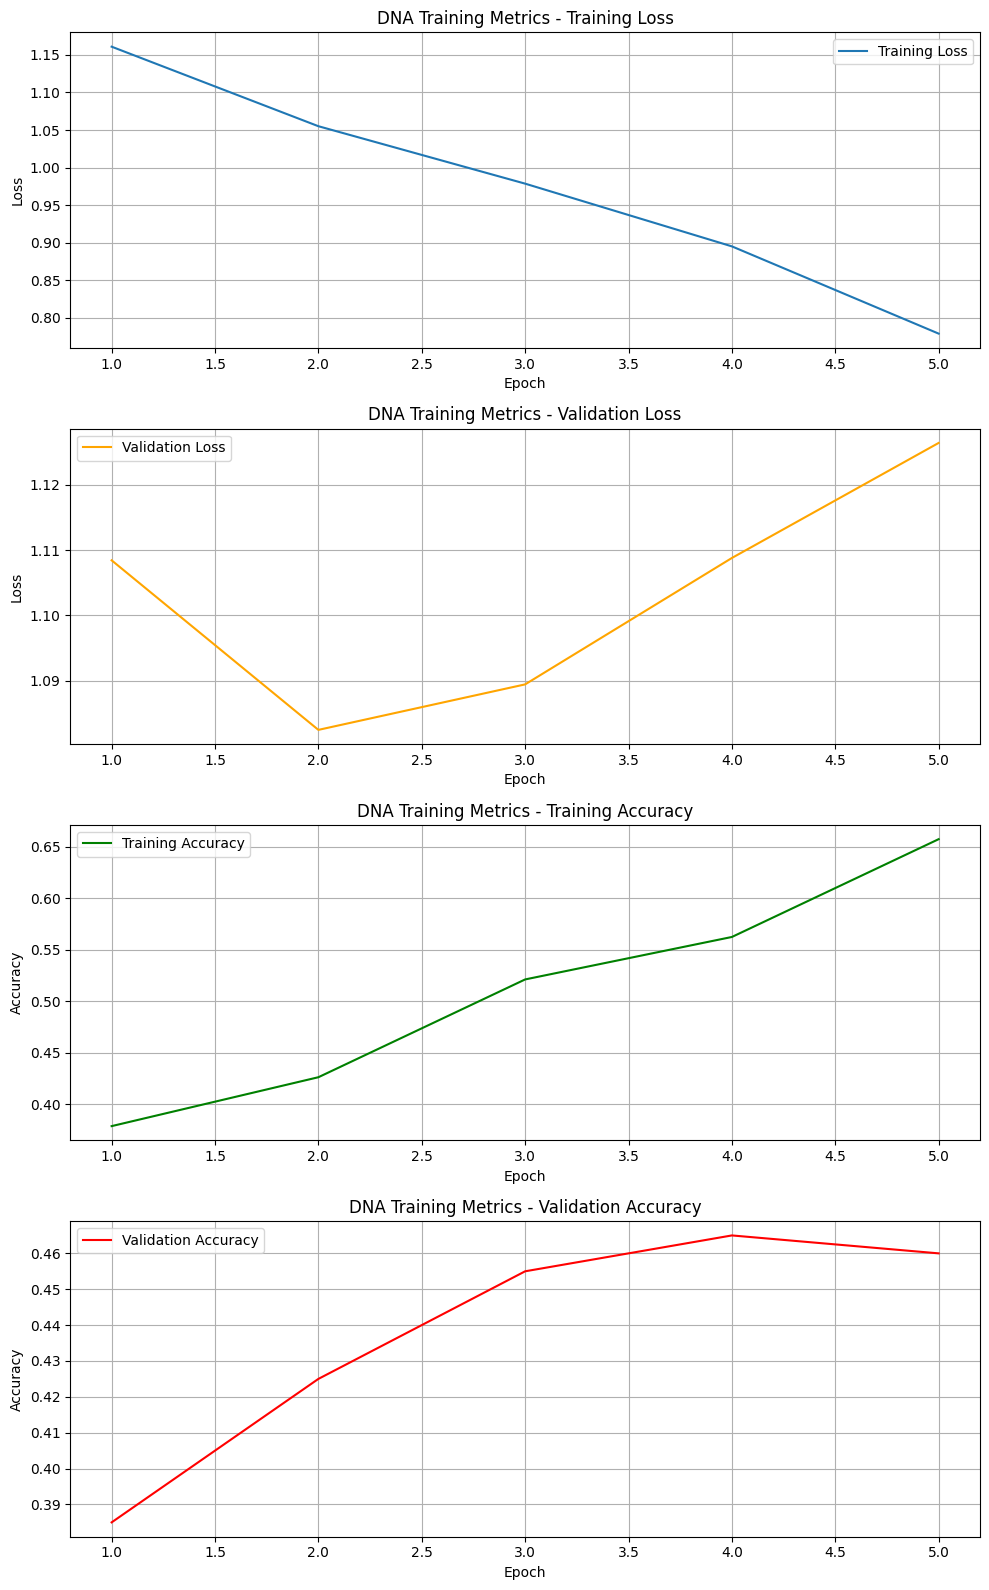

In [ ]:
def plot_metrics(train_losses, val_losses, train_accuracies=None, val_accuracies=None, num_epochs=None, title=""):
    """
    Plots the training loss, training accuracy, validation loss, and validation accuracy.
    Args:
        train_losses: list of training losses
        val_losses: list of validation losses
        train_accuracies: list of training accuracies
        val_accuracies: list of validation accuracies
        num_epochs: number of epochs (now optional, can be inferred from list lengths).
        title: title of the plot
    """
    epochs_to_plot = range(1, len(train_losses) + 1)

    # Determine how many plots are needed
    num_plots = 0
    if train_losses is not None: num_plots += 1
    if val_losses is not None: num_plots += 1
    if train_accuracies is not None: num_plots += 1
    if val_accuracies is not None: num_plots += 1

    if num_plots == 0:
        print("No metrics provided to plot.")
        return

    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 4 * num_plots))
    if num_plots == 1: # If only one plot, axes is not an array, so make it a list
        axes = [axes]

    plot_idx = 0

    if train_losses is not None:
        axes[plot_idx].plot(epochs_to_plot, train_losses, label="Training Loss")
        axes[plot_idx].set_title(f"{title} - Training Loss")
        axes[plot_idx].set_xlabel("Epoch")
        axes[plot_idx].set_ylabel("Loss")
        axes[plot_idx].legend()
        axes[plot_idx].grid(True)
        plot_idx += 1

    if val_losses is not None:
        axes[plot_idx].plot(epochs_to_plot, val_losses, label="Validation Loss", color='orange')
        axes[plot_idx].set_title(f"{title} - Validation Loss")
        axes[plot_idx].set_xlabel("Epoch")
        axes[plot_idx].set_ylabel("Loss")
        axes[plot_idx].legend()
        axes[plot_idx].grid(True)
        plot_idx += 1

    if train_accuracies is not None:
        axes[plot_idx].plot(epochs_to_plot, train_accuracies, label="Training Accuracy", color='green')
        axes[plot_idx].set_title(f"{title} - Training Accuracy")
        axes[plot_idx].set_xlabel("Epoch")
        axes[plot_idx].set_ylabel("Accuracy")
        axes[plot_idx].legend()
        axes[plot_idx].grid(True)
        plot_idx += 1

    if val_accuracies is not None:
        axes[plot_idx].plot(epochs_to_plot, val_accuracies, label="Validation Accuracy", color='red')
        axes[plot_idx].set_title(f"{title} - Validation Accuracy")
        axes[plot_idx].set_xlabel("Epoch")
        axes[plot_idx].set_ylabel("Accuracy")
        axes[plot_idx].legend()
        axes[plot_idx].grid(True)
        plot_idx += 1

    plt.tight_layout()
    plt.show()

# TODO: Plot your DNA classifier's loss and accuracy curves on the training data and the validation data.
# You should have 4 plots total!
plot_metrics(dna_train_losses, dna_val_losses, dna_train_accuracies, dna_val_accuracies, num_epochs=5, title="DNA Training Metrics")

<!-- END QUESTION -->

## Question 4i: DNA Classification Kaggle Competition

Let's take the DNA classification model we just trained and apply it to our class Kaggle competition! Your homework folder should include a file called `dna_test.txt`, which contains 1377 DNA sequences. In the cell below, we've written a helper function for you that loads the `dna_test.txt` file, makes predictions for each DNA sequence, and saves the predictions to a csv file called `dna_test_predictions.csv`.

You should then submit your csv file to the Kaggle competition: [Fa25 CS189 HW4 - DNABERT](https://www.kaggle.com/competitions/fa-25-cs-189-hw-4-competition)

**Expected Output:**
* Your `dna_test_predictions.csv` file should have 2 columns:
    * `ID`: ID of the DNA sequence from the provided test set
    * `class`: the predicted species of the DNA sequence (0 for chimpanzee, 1 for dog, 2 for human).

**Task:**
* Train an instance of a DNA classifier. You have lots of freedom to try changing different parameters, such as how many epochs you train your model for, optimizer choice, learning rate, momentum values, etc.
    * You can also reuse your DNA classification model you trained in question 4g, but we encourage you to explore how you can improve your base model. The space of possibilities to try out is immense!
* Call `generate_dna_test_predictions` with your model to generate a `dna_test_predictions.csv` file.
* Submit your predictions to the DNA classification Kaggle competition.

In [ ]:
def generate_dna_test_predictions(model) -> None:
    """
    Generates predictions for the DNA test set using the specified model.

    Loads the DNA test set from 'dna_test.txt', processes DNA sequences into k-mers,
    creates a DNADataset, and runs the model to obtain predictions for each sequence.
    Predictions are saved to 'dna_test_predictions.csv' with columns 'ID' and 'class'.

    Args:
        model (torch.nn.Module): Trained PyTorch model for DNA sequence classification.

    Outputs:
        dna_test_predictions.csv: CSV file with index column 'ID' and a 'class' column
        containing the predicted class for each dna sample in the test set.
    """
    # Load the DNA test set
    dna_test_df = pd.read_csv('dna_test.txt', sep='\t')
    dna_test_df.columns = ['ID', 'sequence']

    # Convert sequences to k-mers (space-separated strings for tokenizer)
    dna_kmers = dna_test_df['sequence'].apply(lambda seq: sequence_to_kmer(seq, k=6))

    # Create test dataset using DNADataset
    test_dataset = DNADataset(dna_kmers.tolist(), return_targets=False)

    # Create DataLoader
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Make predictions
    model.eval()
    predictions = []

    with torch.no_grad():
        for i in range(len(test_dataset)): # Iterate through all samples in our Dataset
            sample = test_dataset[i]
            input_ids = sample['input_ids'].unsqueeze(0).to(device)  # Add batch dimension: shape (1, seq_len of 512)
            attention_mask = sample['attention_mask'].unsqueeze(0).to(device)  # Add batch dimension: shape (1, seq_len of 512)

            outputs = model(input_ids, attention_mask)
            prediction = torch.argmax(outputs, dim=1).item()
            predictions.append(prediction)

    # Create predictions dataframe
    predictions_df = pd.DataFrame({
        'ID': dna_test_df['ID'],
        'class': predictions
    }).set_index('ID')

    predictions_df.to_csv('dna_test_predictions.csv', index=True) # Generates a csv with 2 columns: ID and class
    print("Submissions saved to dna_test_predictions.csv")

<!-- BEGIN QUESTION -->



In [ ]:
# Optional TODO: Instantiate and train your best DNA classification model!

# TODO: Use your best DNA classifier to make a prediction
generate_dna_test_predictions(dna_classifier)

Submissions saved to dna_test_predictions.csv


<!-- END QUESTION -->

# Subpart 2: Matrices are All You Need - ConvNeXt Sound Classification

Similar to how we can use transformers to encode and decode anything that can be represented as a sequence of numerical tokens, we'll now also explore how creating clever matrix representations can let computer vision models tackle fascinating problems.

At first glance (or first listen), sound might seem like a very different modality from the image data that computer vision models work with. However, by thinking outside the box, we can actually transform the task of sound classification into the task of image classification.

While we're only going to be exploring how to apply computer vision models to sound classification, the possibilities are endless: imagine turning network signals into an graph to detect cybersecurity anomalies, or using meterology data to predict hurricane paths!

First, we'll load the UrbanSound8k dataset.

## UrbanSound8k

[UrbanSound8k Kaggle Dataset](https://www.kaggle.com/datasets/chrisfilo/urbansound8k?select=UrbanSound8K.csv)

The UrbanSound8K dataset consists of 8,732 short audio clips, each lasting up to 4 seconds, collected from real-world urban environments. Every clip is labeled with one of 10 common urban sound classes, such as car horn, dog bark, siren, jackhammer, and more. The dataset also includes a csv with additional metadata about each sound file,including the sound class, the recording fold, and additional details to support supervised learning and evaluation.


The dataset follows a specific naming convention:
Each audio file is named as
`[fsID]-[classID]-[occurrenceID]-[sliceID].wav`
where:
* `fsID`: a unique identifier for the original recording,
* `classID`: an integer representing the sound class (0 for air_conditioner, 1 for car horn, etc.),
* `occurrenceID`: which instance of that sound in the field recording,
* `sliceID`: identifies the particular slice within the occurrence.

For example, `100032-3-0-0.wav` is the first slice `(0)` of the first occurrence `(0)` of the sound class `3` (which corresponds to “dog bark”) from original recording ID `100032`.

For our purposes, we'll only need the `classID` substring from the file names!

### What is Cross-Validation?
The UrbanSound8K dataset is organized into 10 separate “folds”, which are different partitions of the data. Each clip in the dataset is assigned to one of these folds (from 1 to 10), which helps support **cross-validation** experiments for more robust model evaluation. In typical practice, a few folds are used for training, and the remaining ones for validation or testing, rotating which folds are used for each split.

**Cross-validation** is a technique used to reliably estimate how well a machine learning model will perform on new, unseen data. Instead of training and testing our model on just one split of the data, we divide our dataset into several parts (called folds) and rotate using different folds for training and testing. This way, we get multiple performance measurements that can be averaged for a fairer estimate.
* Suppose we have our dataset split into 10 folds (as in UrbanSound8K). In each "round" of cross-validation, we use 9 folds for training and 1 fold for testing. We repeat this ten times, each time with a different fold held out as your test set.
* This ensures every example gets used once for testing and multiple times for training.

For this assignment, we’ll only use the audio clips from fold 1. This keeps things simple, enabling faster prototyping and easier debugging as you work through the fundamentals of urban sound classification.

Acknowledgements: J. Salamon, C. Jacoby and J. P. Bello, ["A Dataset and Taxonomy for Urban Sound Research"](https://dl.acm.org/doi/10.1145/2647868.2655045), 22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.

In [ ]:
# Unzip the training data to data/fold1_train. This may take a few minutes!
!unzip -q urbansound8k_fold1_train.zip -d data/fold1_train

unzip:  cannot find or open urbansound8k_fold1_train.zip, urbansound8k_fold1_train.zip.zip or urbansound8k_fold1_train.zip.ZIP.


Let's listen to one of the audio clips we just downloaded. According to the UrbanSound8k dataset's description, these are the mappings of the `classID`s to the sound's class:
>```python
>class_id_to_sound = {
>    0: "air_conditioner",
>    1: "car_horn",
>    2: "children_playing",
>    3: "dog_bark",
>    4: "drilling",
>    5: "engine_idling",
>    6: "gun_shot",
>    7: "jackhammer",
>    8: "siren",
>    9: "street_music"
> }
>```

Feel free to change the path of the audio file to listen to different clips!

In [ ]:
audio_file = '/content/drive/MyDrive/cs189/hw/hw4/data/fold1_train/101415-3-0-2.wav'

if IS_COLAB:
    from IPython.display import Audio, display
    display(Audio(audio_file, autoplay=False))
else:
    import pygame
    pygame.mixer.init()
    pygame.mixer.music.load(audio_file)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        pygame.time.Clock().tick(10)

In [ ]:
!pip install torchcodec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00


## Creating Spectrograms with Torchaudio

Besides being an awesome Python library for building neural networks, PyTorch also has an official audio processing library called **Torch audio** that comes with handy tools for loading, transforming, and analyzing audio data in deep learning applications. **Torchaudio** is designed to work seamlessly with PyTorch and offers GPU acceleration for audio processing tasks.

The `torchaudio.transforms` module contains common audio feature extraction functions such as spectrograms. These trasnforms can convert raw waveforms into numeric represetnations suitable for neural networks.

The `torchaudio.transforms.Spectrogram` transform converts a raw audio waveform (a 1D array of amplitude values) into a spectrogram. This transformation is useful because it turns sound into an image-like format, which can be processed by image-based machine learning models.

**Spectrograms** are a 2D representation of how the frequency content of the audio changes over time.
* The spectrograms are generated by applying the **Short-Time Fourier Transform (STFT)** to overlapping windows of the audio signal. The result is a matrix where:
    * The x-axis represents time (split into small chunks called time bins)
    * The y-axis represents frequency (split into frequency bins)
    * The values in the matrix show the strength (amplitude) of each frequency at each time
* The `n_fft` parameter stands for "number of FFT points". It controls the size of the window (in samples) used for each Fourier Transform when creating the spectrogram. In other words, it determines how many audio samples are analyzed at a time to compute the frequency content. For example, `n_fft=1024` means each window of 1024 samples is transformed to analyze its frequency content. The choice of `n_fft` is a trade-off between how precisely you want to see changes in frequency versus changes in time.


In the following code:
1. We load an audio file using `torchaudio.load`, which returns the waveform and the rate at which the audio was sampled.
2. Some of the audio clips are stereo (meaning they have 2 audio channels). In those cases, we average the 2 chanenls into a single (mono) channel for easier processing.
3. Then, we use the spectrogram transform to extract a spectrogram of the audio.
4. Finally, we plot the spectrogram using `matplotlib`
    1. Note: The raw values in the spectrogram represent the power (or energy) of each frequency at each time. However, these power values can vary by several orders of magnitude; some frequencies are much louder than others, and the differences can be huge. Taking the log of the power values is a common practice in signal processing to make the scale easier to interpret. Each step in the y-axis corresponds to doubling in power. This is why in the code, we plot `spec.log2`.

Spectrogram shape: torch.Size([1, 513, 376])


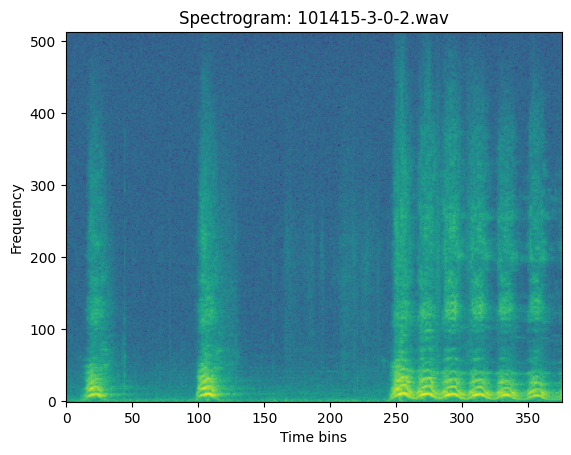

In [ ]:
spectrogram_transform = torchaudio.transforms.Spectrogram(n_fft=1024, normalized=True)

class_id_to_sound = {
    0: "air_conditioner",
    1: "car_horn",
    2: "children_playing",
    3: "dog_bark",
    4: "drilling",
    5: "engine_idling",
    6: "gun_shot",
    7: "jackhammer",
    8: "siren",
    9: "street_music"
}

audio_file = '/content/drive/MyDrive/cs189/hw/hw4/data/fold1_train/101415-3-0-2.wav'

try:
    # Read WAV file
    waveform, sample_rate = torchaudio.load(audio_file)

    # Converts stero to mono by averaging channels. Shape becomes [1, num_samples]
    waveform = waveform.mean(dim=0, keepdim=True)

    # Transform the waveform into a spectrogram
    spec = spectrogram_transform(waveform) # torch.Tensor of shape [1, freq_bins, time_bins]

    # Print the shape of the spectrogram
    print(f"Spectrogram shape: {spec.shape}") # shape [num_frequencies, num_time_bins]

    # Visualize the spectrogram
    plt.figure()
    plt.imshow(spec.log2()[0, :, :].numpy(), aspect='auto', origin='lower') # origin = 'lower' sets input[0, 0] at bottom left
    plt.title(f"Spectrogram: {audio_file.split('/')[-1]}")
    plt.xlabel("Time bins")
    plt.ylabel("Frequency")
    plt.show()
except Exception as e:
    print(f"Error processing {audio_file}: {e}")

## Question 5a: Creating a Custom Dataset of our Spectrograms

We will implement a custom PyTorch Dataset for audio spectrogram classification. Since our audio files that we will be using for training are stored as `.wav` files inside a folder, this dataset will load .wav audio files, convert each to a spectrogram image, and extract the class label from the file name.

**Task:** Implement the `__len__` and `__getitem__` methods of the SpectrogramDataset
1. Implement the `__len__` method, which returns the total number of samples in the Dataset.
2. Implement the `__getitem__` method.
    1. If `return_targets` is `True`, parse the `filename` to get the requested sample's target class. Convert this into a torch.Tensor with `dtype=torch.long`. We will use `return_targets` when creating a training dataset for our model, but when we make test predictions on a test set, we won't have provided targets/labels to instantiate our Dataset with.
3. Load the waveform using `torchaudio.load`.
4. If the audio has 2 stereo channels, average them into a single-channel mono waveform.
5. Generate a spectrogram of the waveform using the class's `spectrogram_transform`.
6. Computer vision models often expect 3-channel input images. The spectrogram only has 1 channel, but we can copy the spectrogram into 3 different channels. Repeat the spectrogram across the first (channel) dimension into a new tensor with shape `(3, H, W)`.
7. If provided, apply additional transformations to the spectrogram.
8. Return the processed spectrogram image and corresponding label.

**Hints:**
1. Python's [`split` function for strings](https://www.w3schools.com/python/ref_string_split.asp) might be helpful for extracting the class ID from the file name.
2. Remember to cast your target to `dtype=torch.long`, which is the datatype that PyTorch loss functions expect for the true labels!
3. You can use [`mean`](https://docs.pytorch.org/docs/stable/generated/torch.Tensor.mean.html#torch.Tensor.mean) to take the average of a `torch.Tensor` over a specified dimension. Make sure to use `keepdim=True` to keep the channel dimension, rather than squishing it!
>```python
>x_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
>mean1 = x_tensor.mean(dim=1, keepdim=False)
>print(f"mean1: {mean1}, shape: {mean1.shape}")
># Output:
>tensor([2., 5.]) torch.Size([2])
>
>mean2 = x_tensor.mean(dim=1, keepdim=True)
>print(f"mean2: {mean2}, shape: {mean2.shape}")
># Output:
>tensor([[2.],
>       [5.]]) torch.Size([2, 1])

4. You can use [`torch.expand`](https://docs.pytorch.org/docs/stable/generated/torch.Tensor.expand.html) to copy the same image along 3 channels.

<!-- BEGIN QUESTION -->



In [ ]:
class SpectrogramDataset(Dataset):
    def __init__(self, audio_dir, transforms=None, spectrogram_transform=None, return_targets=True):
        super().__init__()
        self.audio_dir = audio_dir # Folder where the audio files will be located
        self.transforms = transforms # Additional image transforms
        self.spectrogram_transform = spectrogram_transform or torchaudio.transforms.Spectrogram(n_fft=1024, normalized=True)
        self.return_targets = return_targets  # Whether to return targets or not when __get_item__ is called
        try:
            # Get file paths of all .wav files in the provided directory
            self.file_paths = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
        except Exception as e:
            print(f"Error accessing files at {audio_dir}: {e}")
            self.file_paths = []

    def __len__(self):
        # TODO: 1. Return the number of samples in the dataset
        return len(self.file_paths)

    def __getitem__(self, index):
        # Get the file name by index
        file_name = self.file_paths[index]

        # Construct the path to the requested audio file
        filepath = os.path.join(self.audio_dir, file_name)

        # TODO: 2. Extract the target class_id from the file path if return_targets is True
        # Hint: Files are stored in the format [freesoundID]-[classID]-[occurrenceID]-[sliceID].wav
        # Don't forget to cast the class_id to dtype=torch.long for loss functions!
        if self.return_targets:
            class_id = file_name.split('-')[1]
            target = torch.tensor(int(class_id), dtype=torch.long)

        try:
            # TODO: 3. Load the audio file located at `filepath`
            waveform, sample_rate = torchaudio.load(filepath)
            # TODO: 4. Convert stereo to mono by averaging channels.
            waveform = waveform.mean(dim=0, keepdim=True)

            # TODO: 5. Generate a spectrogram of the waveform. Expected shape: (1, H, W)
            spec = spectrogram_transform(waveform)

            # TODO: 6. Copy the spectrogram into 3 channels to get shape: (3, H, W)
            spec = spec.expand(3, -1, -1)

            # TODO: 7. Apply transformations
            if self.transforms:
                spec = spec.float()
                spec = self.transforms(spec)

            if self.return_targets:
                return spec, target
            else:
                return spec
        except Exception as e:
            print(f'Error processing {filepath}: {e}')
            if self.return_targets:
                return None, None
            else:
                return None


<!-- END QUESTION -->

## Question 5b: Spectrogram DataLoaders

Using the SpectrogramDataset we just defined, let's prepare our training and validation dataloaders.

**Task:**
1. Define a transform using `torchvision.transforms.Resize` that resizes images to (224, 224).
    1. Most computer vision models (like the ConvNeXt model we will use) expect input images of size `224x224`. We'll use a torchvision transform to resize our spectrograms to this shape.
2. Instantiate a `SpectrogramDataset` using `data/fold1_train` as your audio directory. Pass in the path to your `data/fold1_train` directory (which should be located under `/content/drive/MyDrive/cs189/hw/hw4/data/fold1_Train` if you're on Colab, or wherever your UrbanSound8k data was unzipped to locally).
3. Split your `SpectrogramDataset` instance into training and validation sets using scikit-learn's `train_test_split` with a `test_size` of 0.2.
    1. Make sure to set `random_state=SEED` and `shuffle=True`!
4. Create a training DataLoader and a testing DataLoader.
    1. Use `batch_size=32`.
    2. Set `shuffle=True` for the training DataLoader and `shuffle=False` for the testing DataLoader.

<!-- BEGIN QUESTION -->



In [ ]:
# TODO: Define a transform to resize images to (224, 224)
resize_transform = torchvision.transforms.Resize((224, 224))

# TODO: Instantiate a SpectrogramDataset using the folder fold1
spectrogram_dataset = SpectrogramDataset(audio_dir='data/fold1_train', transforms=resize_transform)

# TODO: Create a 0.8 training and 0.2 test split
spectrogram_train_dataset, spectrogram_test_dataset = train_test_split(spectrogram_dataset, test_size=0.2, random_state=SEED, shuffle=True)

# TODO: Create training and testing dataloaders
spectrogram_train_dataloader = DataLoader(spectrogram_train_dataset, batch_size=32, shuffle=True)
spectrogram_test_dataloader = DataLoader(spectrogram_test_dataset, batch_size=32, shuffle=False)

# Printing out the shapes of data and targets in the first batch!
batch = next(iter(spectrogram_train_dataloader))

data, targets = batch
print(f"Shape of 1 batch of data: {data.shape}")
print(f"Shape of 1 batch of targets: {targets.shape}")

Shape of 1 batch of data: torch.Size([32, 3, 224, 224])
Shape of 1 batch of targets: torch.Size([32])


<!-- END QUESTION -->

## Question 5c: Write a Training Loop for the Image Classifier

Before we train our image classifiers, we need to write a training loop! This training loop will be very similar to the one we wrote for the DNA Classifier earlier, but it will be slightly different because of nuances in the input data: for the DNA Classifier, the model expected an `input_ids` and an `attention_mask` as its input. For our image classifier, we simply need to pass in the image as the input.

**Task:** Complete the loop to train and evaluate an image classifier.

For each batch inside the training loop:
1. Move the training input data and targets to the specified device. Cast the inputs as `dtype=torch.float` (to match the dtype of the model's weights) and the targets as `dtype=torch.long` (expected data type for loss function).
2. Reset the optimizer gradients to zero so gradients from the previous batch don't accumulate.
3. Run a forward pass: Pass the inputs `x` through the model to produce the model's output `y_hat`.
4. Calculate the loss between the model's output and the true labels using the `criterion` (loss function).
5. Compute the gradients for the model's parameters by backpropagating from the loss.
6. Update the model parameters by taking one step of the optimizer.
7. Track training statistics.
    1. Add the current loss to the running total in `train_loss`.
    2. Count how many samples the model correctly predicted, and add it to `train_correct`.

For each batch inside the validation loop:

8. Move the validation input data and targets to the device. Cast the inputs as `dtype=torch.float` (to match the dtype of the model's weights) and the targets as `dtype=torch.long` (expected data type for loss function).
9. Do a forward pass through the model to get predictions.
10. Compute the loss on the validation data
11. Track validation metrics
    1. Calculate loss and track the number of correct validation predictions.

**Hints:**
* Make sure you pass the model outputs and the true targets to the criterion in the right order (model outputs first, then true targets)!
* To get the predicted class when calculuating the number of correct predictions, you can use `torch.max` and specify which dimension you want to find the max over! `torch.max` will return two values: the max, and the argmax (i.e. the index where the max occurs). What is the connection betweeh the argmax and the predicted class?
* Since `train_loss` and `train_correct` are floats and integers respectively, you can't directly add a tensor to them. To add a 1D scalar tensor to a float/integer in Python, you need to call `.item()` on the tensor.

<!-- BEGIN QUESTION -->



In [ ]:
def train_image_classifier(model, optimizer, criterion, device, num_epochs, train_dataloader, val_dataloader):
    """
    Args:
        model: the model to train
        optimizer: the optimizer to use
        criterion: the loss function to use
        num_epochs: the number of epochs to train for
        train_dataloader: the dataloader for the training set
        val_dataloader: the dataloader for the validation set
    Returns:
        train_losses: a list of training losses for each epoch
        val_losses: a list of validation losses for each epoch
        train_accuracies: a list of training accuracies for each epoch
        val_accuracies: a list of validation accuracies for each epoch
    """
    # === SETUP ===
    model.to(device)

    # Lists to store metrics across epochs
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # === EPOCH LOOP ===
    for epoch in range(num_epochs):
        # === TRAINING PHASE ===
        model.train() # Set model to training mode

        # Initialize metrics for this epoch
        train_loss = 0.0
        train_correct = 0

        # === INNER LOOP (iterate over training batches) ===
        for batch in train_dataloader:
            # TODO 1: Move the data and targets to device and cast them to the appropriate dtypes
            x, y = batch
            x, y = torch.tensor(x.to(device), dtype=torch.float), torch.tensor(y.to(device), dtype=torch.long)

            # TODO 2: Reset gradients
            optimizer.zero_grad()

            # TODO 3: Forward pass: pass inputs to model
            y_hat = model(x)

            # TODO 4: Compute loss
            loss = criterion(y_hat, y)

            # TODO 5: Backward pass/compute gradients
            loss.backward()

            # TODO 6: Update parameters
            optimizer.step()

            # TODO 7: Track training metrics for this epoch
            train_loss += loss.item()
            _, preds = torch.max(y_hat, 1)
            train_correct += (preds == y).sum().item()

        # === END OF INNER LOOP ===

        # Compute average training metrics for the epoch
        train_loss /= len(train_dataloader)
        train_acc = train_correct / len(train_dataloader.dataset)

        # Append this epoch's training metrics to history
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        print(f"Epoch {epoch + 1}: Training loss = {train_loss}\tTrain accuracy = {train_acc}")

        # === END OF TRAINING PHASE ===

        # === VALIDATION PHASE ===
        model.eval() # set model to evaluation mode
        val_loss = 0.0
        val_correct = 0

        with torch.no_grad():
            # === INNER LOOP (iterate over validation batches) ===
            for batch in val_dataloader:
                # TODO 8: Move the data and targets to device and cast them to the appropriate dtypes
                x, y = batch
                x, y = torch.tensor(x.to(device), dtype=torch.float), torch.tensor(y.to(device), dtype=torch.long)

                # TODO 9: Forward pass only
                y_hat = model(x)

                # TODO 10: Compute loss
                loss = criterion(y_hat, y)

                # TODO 11: Track validation metrics
                val_loss += loss.item()
                _, preds = torch.max(y_hat, 1)
                val_correct += (preds == y).sum().item()

            # === END OF INNER LOOP ===

            val_loss /= len(val_dataloader)
            val_acc = val_correct / len(val_dataloader.dataset)

        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch + 1}: Validation loss = {val_loss}\tValidation accuracy = {val_acc}")

        # === END OF VALIDATION PHASE ===

    # === END OF EPOCH LOOP ===

    print(f"=" * 20 + " Final Metrics " + "=" * 20)
    print(f"Final training loss: {train_losses[-1]:.5f}\tFinal training accuracy = {train_accuracies[-1]:.5f}")
    print(f"Final validation loss: {val_losses[-1]:.5f}\tFinal validation accuracy = {val_accuracies[-1]:.5f}")
    print(f"=" * 55)

    # Return history
    return train_losses, val_losses, train_accuracies, val_accuracies

<!-- END QUESTION -->

## Introducing ConvNeXt
ConvNeXt is a modern convolutional neural network architecture designed to combine the strengths of traditional CNNs with design principles inspired by Transformers. Introduced in 2022 by Liu et al. in the paper ["A ConvNet for the 2020s"](https://arxiv.org/abs/2201.03545), it proved that pure convolutional neural networks could still perform favorably with modern transformer-based vision models! ConvNeXt updates classical CNN components (like ResNet) with design choices inspired by Vision Transformers. It was trained on the large-scale ImageNet dataset with 1000 classes, making it a powerful backbone for image classification tasks.

### ConvNeXt architecture
* **Residual connections**: Like ResNets, ConvNeXt uses skip connections to help gradients flow and enable training of very deep networks.
* **Layer normalization**: It replaces batch normalization with layer normalization, a technique popularized by Transformers, which can improve training stability.
* **Strided convolutions to create patches**: ConvNeXt uses a `4×4` convolution with stride 4 at the first layer to slice the input image into non-overlapping patches. This is similar to how Vision Transformers process patches of images to create patch embeddings.
* **Large receptive fields**: At later layers, ConvNeXt uses large convolution kernels. The larger convolution kernels have larger receptive fields, allowing the model to capture global context.
    * While Transformers rely on self-attention to model relationships between all parts of the input, ConvNeXt achieves similar global context awareness through large convolution kernels.
* **Depthwise convolutions**: ConvNeXt replaces some regular convolutions with depthwise convolutions. Depthwise convolutions apply a separate convolutional filter for each channel. As a result, information is not mixed between channels.
* **Inverted Bottleneck Block**: Inspired by feed-forward networks in Transformers, ConvNeXt has blocks where the channel count is increased to learn many different representations of the hidden outputs, before being shrunk back down to fewer channels.
* **Fewer activations and norms per block**: Like Transformers, ConvNeXt simplifies blocks with fewer activations (GELU instead of ReLU) and fewer normalization layers, learning that this actually improves results.
* **Advanced data augmentation and regularization**: ConvNeXt incorporates contemporary augmentation techniques like Mixup, CutMix, and regularization borrowed from ViTs for further improvements.

ConvNeXt can be seen as a bridge between CNNs and Transformers, combining the efficiency and inductive biases of convolutions with some of the design insights from Transformer models.

## Question 5d: Adapting ConvNeXt for Sound Classification

ConvNeXt was trained on the ImageNet dataset, which has 1000 classes. As a result, the final linear layer in the ConvNeXt's classifer has an output dimension of 1000: for each training point $x_i$ in our batch, the ConvNeXt will output a 1000-dimensional vector containing the probabilities that $x_i$ belongs to each of the 1000 classes. Our spectrogram dataset has 10 classes (air conditioner, car horn, children playing, dog bark, drilling, engine idling, gun shot, jackhammer, siren, street music). So to modify the ConvNeXt for our new sound classification task, we need to replace the final classifer layer with one that has an output dimension of 10 to match the number of classes we have.

When working with PyTorch models like ConvNeXt, it's important to understand how modules and layers are organized and accessed:
* Most models have named attributes for their main components. For ConvNeXt, the classifier head is stored in the `model.classifier` attribute. This is typically a `nn.Sequential` container holding several layers.
* You can access individual layers inside a sequential module by indexing. For example, `model.classifier[-1]` gets the last layer in the classifier sequence (which is usually the final linear layer responsible for outputting class scores).
* To get the `in_features` and `out_features` dimension of a linear layer, you can access its `.in_features` attribute.
* Lastly, when replacing layers, you can directly assign a new layer to a position in the sequence. For instance, `model.classifier[-1] = nn.Linear(...)` replaces the last layer with a new linear layer that outputs the desired number of classes.

**Task:** Implement `replace_final_convnext_linear_layer`, which repalces the final linear layer of the ConvNeXt's classifier module with a new linear layer that outputs the specified number of classes.

**Hints:**
* Use the guidelines above to access the final linear layer of the model's classifier module. For the new linear layer we will replace the final linear layer with, what should the `in_features` parameter be and what should the `out_features` paramter be so that our model outputs the right number of class predictions?


<!-- BEGIN QUESTION -->



In [ ]:
def replace_final_convnext_linear_layer(model, num_classes=10):
    # TODO: Access the classifier module of the model
    classifier = model.classifier

    # TODO: Get the input dimensions of the classifier's last linear layer
    in_features = classifier[-1].in_features

    # TODO: Create a new linear layer with the correct input and output dimensions
    classifier[-1] = nn.Linear(in_features, num_classes)

    return model

<!-- END QUESTION -->

## Pre-training and Fine-tuning

In part 1 of this homework, we trained our own models from the ground up. In modern machine learning, fine-tuning pretrained models has become a foundational technique that offers significant advantages over training models from scratch. We can leverage models that have already learned rich feature representations from massive datasets, and then adapt them efficiently to specific tasks with limited data and computational resources! Earlier, we adapted DNABERT (pretrained to encode DNA kmers) by fine-tuning it to classify DNA sequences. Now, we'll fine-tune ConvNeXt, which was trained on ImageNet-1k, for spectrogram classification.

### A quick refresher on backbones vs. classification heads
*  Backbone: The main part of the model that extracts features from input images (e.g., all convolutional layers).
* Classification Head: The final layers that take backbone features and output class predictions (e.g., a linear layer mapping to class scores).

### Loading pretrained models in PyTorch
PyTorch makes it easy to load pretrained models for computer vision tasks. For example, you can load ResNet50 with pretrained weights using:
>```python
>from torchvision.models import resnet50, ResNet50_Weights
>
> # Pretrained on ImageNet
> model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
>
> # Best available weights (currently alias for IMAGENET1K_V2)
> # Note that these weights may change across versions
> model = resnet50(weights=ResNet50_Weights.DEFAULT)
>
># Strings are also supported
> model = resnet50(weights="IMAGENET1K_V2")
>```

If we want only the ResNet50 model architecture itself, we can load it with randomly initialized weights:
>```python
> # No weights - random initialization
> model = resnet50(weights=None)
>```

You can read more about working with [PyTorch's pretrained models in the documentation here](https://docs.pytorch.org/vision/main/models.html)!


### Fine-tuning paradigms
When adapting a pretrained model to a new task, you have several options:

#### 1. Training from Scratch (Uninitialized Weights)
* Load the model with randomly initailized weights by specifying`weights=None`.
* The model learns everything from your dataset, but may require more data and training time.

#### 2. Pretrained Weights with Frozen Backbone:
* Load the model with pretrained weights.
* "Freeze" the backbone by setting `requires_grad=False` for its parameters. This tells PyTorch not to track gradients for any weights in the backbone. When we perform the optimizer step after backpropagation, none of the backbone's weights will get updated. Only the classification head is trainable.
* The backbone acts as a fixed feature extractor; only the head adapts to your new classes.
* Useful when you have limited data or want to avoid overfitting.

#### 3. Pretrained Weights with All Layers Trainable (Full Fine-tuning):
* Load the model with pretrained weights.
* All layers (backbone and head) are trainable (all their parameters have `requires_grad=True`).
* The model can adapt all its features to your new dataset, often leading to better performance if you have enough data. Even though we are updating all the weights in the model during training, our model can train faster or reach better metrics faster becuase the backbone already has some feature extraction ability, even if it was previously pretrained on a totally different dataset.

### How to Freeze/Unfreeze Layers
You can iterate through the parameters in a model using either `parameters` or `named_parameters`.

To freeze all layers except for the classifier:
>```python
>for name, param in frozen_backbone.named_parameters():
>    if "classifier" not in name: # Freeze any non-classifier layers
>        param.requires_grad = False
>```

To unfreeze (train) all layers:
>```python
> for param in model.parameters():
>   param.requires_grad = True
>```

## Question 5e: Train a ConvNeXt from Scratch

First, we will load a ConvNeXt model with randomly initialized weights (no pretraining), adapt it for our sound classification problem, and train it on our spectrogram dataset.

**Tasks:**
1. Instantiate ConvNeXt with no pretrained weights:
    1. Use `convnext_base(weights=None)` to create a model with random weights.
2. Use the `replace_final_convnext_linear_layer` to replace the final classification layer in the ConvNeXt.
3. Initialize an `AdamW` optimizer and pass in the model's parameters.
    1. Play around with different learning rates to find the best learning rate! Track if the training metrics being printed every epoch are improving meaningfully to see if your learning rate is appropriate. We recommend starting with a learning rate in the range `1e-4` to `1e-3`, and modifying the learning rate by factors of 2x (e.g. to `2e-4`, then `4e-4`) or 10x (e.g. to `1e-5` or `1e-3`) to see if it yields improved performance.
4. Initialize `CrossEntropyLoss` as the loss function.
5. Train the model for **5 epochs** on  `spectrogram_train_dataloader` and `spectrogram_test_dataloader` using the `train_image_classifier` function.
6. Use the helper function `plot_metrics` from question 4h to visualize the training loss, training accuracy, validation loss, and validation accuracy curves over all the epochs.


**Hints:**
* We have 10 possible sounds to classify a spectrogram as. Think about how this relates to the output dimension our final clasifer linear layer should have.
* Explore a few different learning rates for your optimizer and see how that affects the training metrics. Use the best learning rate you find to train your model for your visualization.

Your model should reach **> 0.20** training accuracy after **5 epochs.**

<!-- BEGIN QUESTION -->



/tmp/ipython-input-1602361656.py:38: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch 1: Training loss = 2.3627567092577615	Train accuracy = 0.15232974910394265


/tmp/ipython-input-1602361656.py:84: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch 1: Validation loss = 2.2036905527114867	Validation accuracy = 0.2857142857142857
Epoch 2: Training loss = 2.1838123864597745	Train accuracy = 0.1827956989247312
Epoch 2: Validation loss = 2.1354250431060793	Validation accuracy = 0.24285714285714285
Epoch 3: Training loss = 2.0531402031580606	Train accuracy = 0.25806451612903225
Epoch 3: Validation loss = 2.2003135681152344	Validation accuracy = 0.2571428571428571
Epoch 4: Training loss = 2.023954153060913	Train accuracy = 0.26881720430107525
Epoch 4: Validation loss = 2.3446309566497803	Validation accuracy = 0.2
Epoch 5: Training loss = 2.0823428167237177	Train accuracy = 0.22580645161290322
Epoch 5: Validation loss = 2.131156587600708	Validation accuracy = 0.2785714285714286
==================== Final Metrics ====================
Final training loss: 2.08234	Final training accuracy = 0.22581
Final validation loss: 2.13116	Final validation accuracy = 0.27857


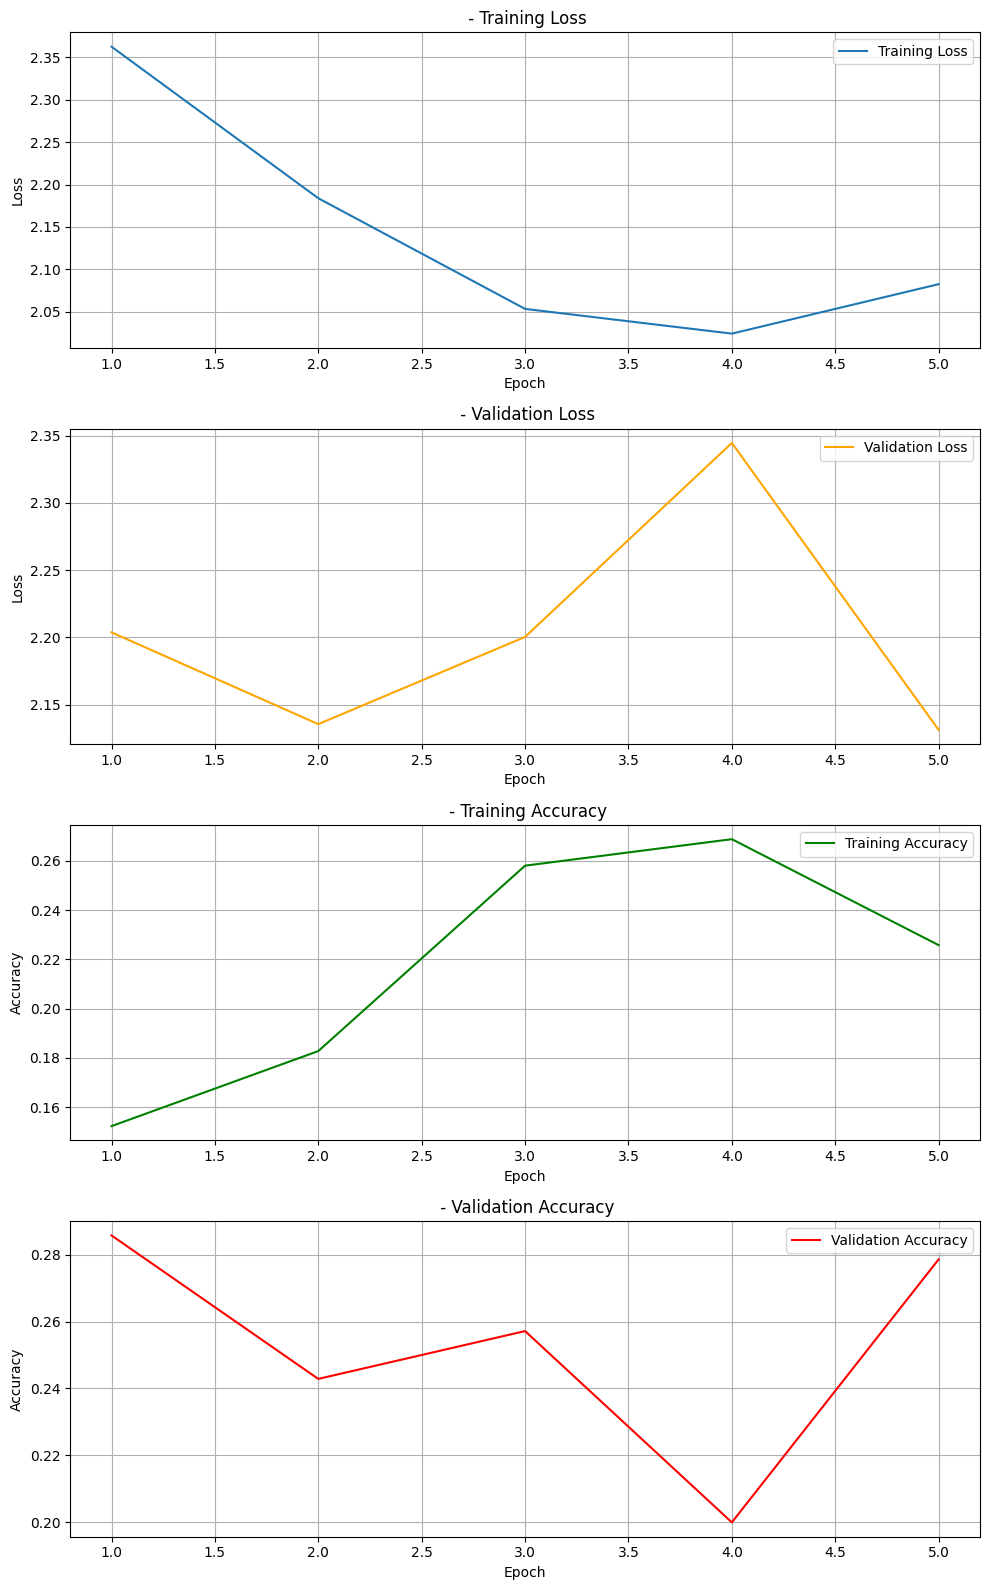

In [ ]:
# TODO: Load a ConvNeXt model with uninitialized weights
uninitialized_convnext = convnext_base(weights=None)

# TODO: Replace the final classification layer of the ConvNeXt
uninitialized_convnext = replace_final_convnext_linear_layer(uninitialized_convnext)

# TODO: Initialize the optimizer
optimizer = AdamW(uninitialized_convnext.parameters(), lr=1e-4)

# TODO: Define the loss function
criterion = nn.CrossEntropyLoss()

# TODO: Train your model for 5 epochs
unintialized_train_losses, unintialized_val_losses, unintialized_train_accuracies, unintialized_val_accuracies = train_image_classifier(uninitialized_convnext, optimizer, criterion, device, 5, spectrogram_train_dataloader, spectrogram_test_dataloader)

# TODO: Plot the metrics
plot_metrics(unintialized_train_losses, unintialized_val_losses, unintialized_train_accuracies, unintialized_val_accuracies)

<!-- END QUESTION -->

## Question 5f: Train a ConvNeXt with a Frozen Backbone

Now, you'll adapt and train a ConvNeXt model using pretrained weights, but only the classifier head will be updated—the backbone will be "frozen" and act as a fixed feature extractor.

**Tasks:**
1. Instantiate ConvNeXt with pretrained weights:
    1. Use `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1` to load a model with weights trained on ImageNet.
2. Use the `replace_final_convnext_linear_layer` to replace the final classification layer in the ConvNeXt
3. Freeze the backbone. By default, all the parameters in all the layers of the model will be trainable. Set `requires_grad=False` for all model parameters except those in the classifier.
4. Initialize an `AdamW` optimizer and pass in the model's parameters.
    1. Note: Even if you pass in all the model's parameters to the optimizer, it wil only update those that have `requires_grad` set to `True`.
    2. Play around with different learning rates to find the best learning rate! Track if the training metrics being printed every epoch are improving meaningfully to see if your learning rate is appropriate. We recommend starting with a learning rate in the range `1e-4` to `1e-3`, and modifying the learning rate by factors of 2x (e.g. to `2e-4`, then `4e-4`) or 10x (e.g. to `1e-5` or `1e-3`) to see if it yields improved performance.
5. Initialize `CrossEntropyLoss` as the loss function.
6. Train the model for **5 epochs** on  `spectrogram_train_dataloader` and `spectrogram_test_dataloader` using the `train_image_classifier` function.
7. Use `plot_metrics` to visualize the training loss, training accuracy, validation loss, and validation accuracy curves over all the epochs.

**Hints:**
* `named_parameters()` produces an iterator that returns a tuple of the form (name, parameter) for each parameter in the model. How can you use the name to identify which parameters you need to freeze?

Your model should reach **> 0.30** training accuracy after **5 epochs.**

<!-- BEGIN QUESTION -->



Downloading: "https://download.pytorch.org/models/convnext_base-6075fbad.pth" to /root/.cache/torch/hub/checkpoints/convnext_base-6075fbad.pth


100%|██████████| 338M/338M [00:01<00:00, 178MB/s]
/tmp/ipython-input-1602361656.py:38: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch 1: Training loss = 2.3004482057359485	Train accuracy = 0.1111111111111111


/tmp/ipython-input-1602361656.py:84: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch 1: Validation loss = 2.2985441207885744	Validation accuracy = 0.16428571428571428
Epoch 2: Training loss = 2.2199196683035956	Train accuracy = 0.21863799283154123
Epoch 2: Validation loss = 2.2367115020751953	Validation accuracy = 0.24285714285714285
Epoch 3: Training loss = 2.166374815834893	Train accuracy = 0.27956989247311825
Epoch 3: Validation loss = 2.1893656253814697	Validation accuracy = 0.3142857142857143
Epoch 4: Training loss = 2.1144696871439614	Train accuracy = 0.3333333333333333
Epoch 4: Validation loss = 2.1456260681152344	Validation accuracy = 0.3142857142857143
Epoch 5: Training loss = 2.06380213631524	Train accuracy = 0.3602150537634409
Epoch 5: Validation loss = 2.104296350479126	Validation accuracy = 0.36428571428571427
==================== Final Metrics ====================
Final training loss: 2.06380	Final training accuracy = 0.36022
Final validation loss: 2.10430	Final validation accuracy = 0.36429


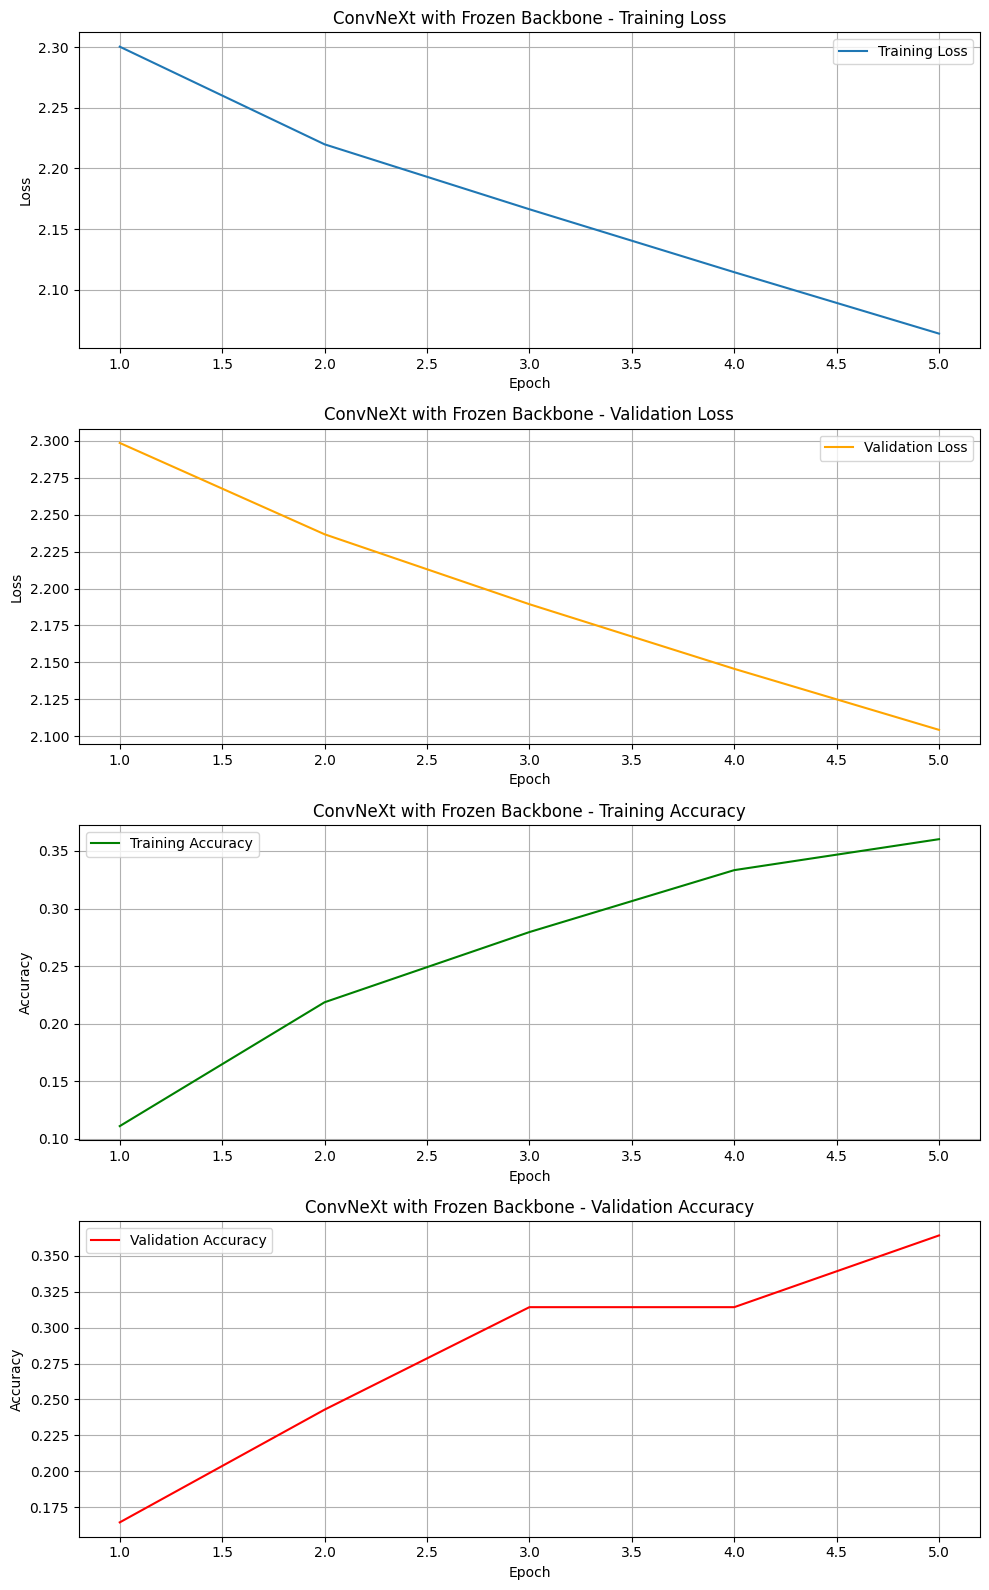

In [ ]:
# TODO: Load a ConvNeXt model with pretrained weights
frozen_backbone = convnext_base(weights=ConvNeXt_Base_Weights.IMAGENET1K_V1)

# TODO: Replace the final classification layer of the ConvNeXt
frozen_backbone = replace_final_convnext_linear_layer(frozen_backbone)

# TODO: Freeze the ConvNeXt's backbone
for name, param in frozen_backbone.named_parameters():
   if "classifier" not in name: # Freeze any non-classifier layers
       param.requires_grad = False

# TODO: Initialize the optimizer
optimizer = AdamW(frozen_backbone.parameters(), lr=1e-4)

# TODO: Define the loss function
criterion = nn.CrossEntropyLoss()

# TODO: Train your model for 5 epochs
frozen_bb_train_losses, frozen_bb_val_losses, frozen_bb_train_accuracies, frozen_bb_val_accuracies = train_image_classifier(frozen_backbone, optimizer, criterion, device, 5, spectrogram_train_dataloader, spectrogram_test_dataloader)

# TODO: Plot the metrics
plot_metrics(frozen_bb_train_losses, frozen_bb_val_losses, frozen_bb_train_accuracies, frozen_bb_val_accuracies, 5, "ConvNeXt with Frozen Backbone")

<!-- END QUESTION -->

## Question 5g: Train a ConvNeXt with All Layers Unfrozen

Lastly, we'll use ConvNeXt pretrained on ImageNet, but we'll allow all model layers—including the backbone and the classification head—to update during training. This is called full finetuning and usually achieves the best adaptation to our data when we have enough examples.

**Tasks:**
1. Instantiate ConvNeXt with pretrained weights:
    1. Use `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1` to load a model with weights trained on ImageNet.
2. Use the `replace_final_convnext_linear_layer` to replace the final classification layer in the ConvNeXt.
3. Ensure all layers are trainable. By default, all parameters in the model have `requires_grad=True`, but to be safe, loop through all the parameters again and explicitly set them to be trainable.
4. Initialize an `AdamW` optimizer and pass in the model's parameters.
    1. Play around with different learning rates to find the best learning rate! Track if the training metrics being printed every epoch are improving meaningfully to see if your learning rate is appropriate. We recommend starting with a learning rate in the range `1e-4` to `1e-3`, and modifying the learning rate by factors of 2x (e.g. to `2e-4`, then `4e-4`) or 10x (e.g. to `1e-5` or `1e-3`) to see if it yields improved performance.
5. Initialize `CrossEntropyLoss` as the loss function.
6. Train the model for **5 epochs** on  `spectrogram_train_dataloader` and `spectrogram_test_dataloader` using the `train_image_classifier` function.
7. Use `plot_metrics` to visualize the training loss, training accuracy, validation loss, and validation accuracy curves over all the epochs.

**Hints:**
* You can confirm if all of the model's parameters are trainable by printing out `parameter.requires_grad()` for each parameter in the model.

Your model should reach **> 0.90** training accuracy after **5 epochs.**

<!-- BEGIN QUESTION -->



In [ ]:
# TODO: Load a ConvNeXt model with pretrained weights
unfrozen_convnext = convnext_base(weights=ConvNeXt_Base_Weights.IMAGENET1K_V1)

# TODO: Replace the final classification layer of the ConvNeXt
unfrozen_convnext = replace_final_convnext_linear_layer(unfrozen_convnext)

# TODO: Make sure all the parameters are trainable
for param in unfrozen_convnext.parameters():
  param.requires_grad = True

# TODO: Initialize the optimizer
optimizer = AdamW(unfrozen_convnext.parameters(), lr=9e-5)

# TODO: Define the loss function
criterion = nn.CrossEntropyLoss()

# TODO: Train your model for 5 epochs
unfrozen_train_losses, unfrozen_val_losses, unfrozen_train_accuracies, unfrozen_val_accuracies = train_image_classifier(unfrozen_convnext, optimizer, criterion, device, 5, spectrogram_train_dataloader, spectrogram_test_dataloader)

# TODO: Plot the metrics
plot_metrics(unfrozen_train_losses, unfrozen_val_losses, unfrozen_train_accuracies, unfrozen_val_accuracies, 5, "full finetuning - ConvNeXt")

/tmp/ipython-input-1602361656.py:38: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



KeyboardInterrupt: 

<!-- END QUESTION -->

## Question 5h: Comparing Results of Different Fine-tuning Paradigms

Which of the 3 fine-tuning approaches was the most effective? Why? Can you think of some disadvantages of this approach, and some scenarios where we might want to use the other 2 approaches instead?


_Full fine-tuning often performs best because it allows the entire backbone to adapt its features to the new domain, leading to higher accuracy when you have enough data. However, it can easily overfit small datasets, requires significantly more compute, and may overwrite useful pretrained features. A frozen backbone is better when your dataset is small, your compute is limited, or you only need generic features and fast training. Training from scratch is preferable only when your domain is completely different from the pretrained one or when you have a massive dataset that can support learning all features from the ground up._

<!-- END QUESTION -->

## Question 5i: Listening to our Classifier's Predictions!

Now that your ConvNeXt is trained, let’s have some fun. We'll listen to a sound and compare it to what our model classifies the sound as!

**Task:**
1. Choose an audio file to listen to, and save its file path into the variable `audio_file`.
2. Load the `.wav` file using `torchaudio.load`.
3. If the audio is stereo, average the channels to create a single mono waveform.
4. Generate a spectrogram of the audio's waveform using `torchaudio`'s `spectrogram` transform.
5. Resize the spectrogram into a (224 x 224) image.
6. Expand the spectrogram's number of channels from 1 channel to 3 channels for model compatibility.
7. Add a batch dimension (so the shape of the spectrogram is `(1, 3, 224, 224)`).
8. Move the input to the correct device and cast it as `torch.float`.
9. Pass the spectrogram to your trained ConvNeXt (pick any of the 3 you trained earlier!).
10. Get the model's prediction by finding the class with the highest score.
11. Look up the class label corresponding to the ConvNeXt's predicted class using the `class_id_to_sound` dictionary.
12. Parse the audio file's name to get the true class ID and look up the class label corresponding to the true class ID using the `class_id_to_sound` dictionary.

Listen to the sound and see if you would make the same prediction as your model!

<!-- BEGIN QUESTION -->



In [ ]:
# TODO 1: Pick an audio file to listen to and save it to the `audio_file` variable
audio_file = '/content/drive/MyDrive/cs189/hw/hw4/data/fold1_train/101415-3-0-2.wav'
if IS_COLAB:
    from IPython.display import Audio, display
    display(Audio(audio_file, autoplay=False))
else:
    import pygame
    pygame.mixer.init()
    pygame.mixer.music.load(audio_file)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        pygame.time.Clock().tick(10)

try:
    # TODO 2: Load the .wav audio file
    waveform, sample_rate = torchaudio.load(audio_file)

    # TODO 3: Average the channels to create a single mono channel
    waveform = waveform.mean(dim=0, keepdim=True)

    # TODO 4: Generate a spectrogram
    spec = spectrogram_transform(waveform)

    # TODO 5: Resize the spectrogram into the shape (1 x 224 x 224)
    resize_transform = torchvision.transforms.Resize((224, 224))
    spec = resize_transform(spec)

    # TODO 6: Repeat the spectrogram 3 times to have 3 channels
    spec = spec.expand(3,-1,-1)

    # TODO 7: Add a batch dimension
    spec = spec.unsqueeze(0)

    # TODO 8: Move the input to the right device and cast it to the right dtype
    spec = torch.tensor(spec.to(device), dtype=torch.float)

    # TODO 9: Get the model's outputs
    y_hat = unfrozen_convnext(spec)

    # TODO 10: find the class with the highest output score
    _, pred = torch.max(y_hat, 1)

    # TODO 11: Look up the class label of the model's prediction
    predicted_class = class_id_to_sound[pred.item()]

    # TODO 12: Parse the audio file's name to get the true class ID and the true class label
    true_class_id = audio_file.split('-')[1]
    true_class = class_id_to_sound[int(true_class_id)]

    print(f"Predicted class: {predicted_class}")
    print(f"True class: {true_class}")
except Exception as e:
    print(f'Error processing {audio_file}: {e}')

Predicted class: dog_bark
True class: dog_bark


/tmp/ipython-input-2693097492.py:35: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).



<!-- END QUESTION -->

## Question 5j: Sound Classification Kaggle Competition

Just like the DNA classification competition, we can take the audio classification model we just trained and make predictions for our 2nd class Kaggle competition! Your homework folder should include two files: `urbansound8k_test.zip` and `urbansound8k_test.csv`. The zip file contains 175 audio files in .wav format, and the CSV file contains the mapping of IDs to filenames. In the cell below, we've written a helper function for you that unzips the test audio files, loads them, makes predictions for each audio sample, and saves the predictions to a csv file called `urbansound8k_test_predictions.csv`.

You should then submit your csv file to the Kaggle competition: [Fa25 CS189 HW4 - UrbanSound8k](https://www.kaggle.com/competitions/fa-25-cs-189-hw-4-urban-sounds-8-k/overview)

**Expected Output:**
* Your `urbansound8k_test_predictions.csv` file should have 2 columns:
    * `ID`: ID of the audio sample from the provided test set
    * `class`: the predicted class of the audio sample (0-9, corresponding to the 10 UrbanSound8K classes: `air_conditioner`, `car_horn`, `children_playing`, `dog_bark`, `drilling`, `engine_idling`, `gun_shot`, `jackhammer`, `siren`, `street_music`).

**Task:**
* Train an instance of a sound ConvNeXt classifier. You can try out different fine-tuning approaches, such as freezing or unfreezing certain layers beyond the ones we tried earlier in questions 5e, 5f, and 5g!
* Call `generate_urbansound8k_test_predictions` with your model to generate a `urbansound8k_test_predictions.csv` file.
* Submit your predictions to the UrbanSound8k classification Kaggle competition.

In [ ]:
# Unzip the test data to data/urbansound8k_test. This may take a few minutes!
!unzip -q urbansound8k_test.zip -d data/urbansound8k_test

In [ ]:
def generate_urbansound8k_test_predictions(model):
    """
    Generates predictions for the UrbanSound8K test set using the specified model.

    Loads the test metadata from 'urbansound8k_test.csv', applies necessary transforms
    to each audio sample in the 'urbansound8k_test' directory, and creates a test dataset.
    Runs the model in evaluation mode to predict class labels for each test spectrogram.
    Predictions are saved to 'urbansound8k_test_predictions.csv' with columns 'ID' and 'class',
    where 'ID' is taken from the test CSV.

    Args:
        model (torch.nn.Module): Trained PyTorch model for UrbanSound8K classification.

    Outputs:
        urbansound8k_test_predictions.csv: CSV file with index column 'ID' and a 'class' column
        containing the predicted class for each audio sample in the test set.
    """
    # Load the UrbanSound8k test CSV with IDs
    test_df = pd.read_csv('urbansound8k_test.csv')

    # Define the resize transform (same as used for training)
    resize_transform = torchvision.transforms.Resize(size=[224, 224])

    # Create test dataset with return_targets=False
    test_dataset = SpectrogramDataset(
        audio_dir='/content/drive/MyDrive/cs189/hw/hw4/data/urbansound8k_test',
        return_targets=False,
        transforms=resize_transform
    )

    # Make predictions
    model.eval()
    predictions = []

    with torch.no_grad():
        for i in range(len(test_dataset)): # Iterate through all samples in our Dataset
            spec = test_dataset[i]

            if spec is None:
                predictions.append(-1)
                continue

            # Add batch dimension and move to device
            spec = spec.unsqueeze(0).to(device) # shape: (1, 224, 224)

            # Make prediction
            output = model(spec)
            pred_class = torch.argmax(output, dim=1).item()
            predictions.append(pred_class)

    # Create predictions dataframe
    predictions_df = pd.DataFrame({
        'ID': test_df['ID'],
        'class': predictions
    }).set_index('ID')

    predictions_df.to_csv('urbansound8k_test_predictions.csv', index=True) # Generates a csv with 2 columns: ID and class
    print("Submissions saved to urbansound8k_test_predictions.csv")

<!-- BEGIN QUESTION -->



In [ ]:
# Optional TODO: Instantiate and train your best DNA classification model!


# TODO: Use your best sound classifier to make a prediction
generate_urbansound8k_test_predictions(unfrozen_convnext)

Submissions saved to urbansound8k_test_predictions.csv


<!-- END QUESTION -->

# Submission Checklist

Please make sure you have completed the following steps before submitting your assignment.

## Have you...
- [ ] Saved your notebook as a PDF, ensuring that all the code cells, written questions (if applicable), and graphs are visible?
- [ ] Included your **Kaggle username** and a screenshot of your **2 Kaggle scores** in your PDF submission?
- [ ] Run the export cell in the notebook to generate a zip file containing all the code from this notebook?
- [ ] Included an acknowledgement of any GenAI assistance you used while completing this assignment, if applicable? (See the [CS 189/289 syllabus](https://eecs189.org/fa25/syllabus/#collaboration-policy-and-academic-honesty) for full details of the course's GenAI policy and for an example acknowledgement format you can use).

## Submissions
- [ ] Submitted your test set predictions for the **Fa25 CS189 HW 4 - DNABERT** and **Fa25 CS189 HW4 - UrbanSound8k** Kaggle competitions?
- [ ] Submitted the PDF of your notebook and Kaggle submissions to the `HW 4.2 Coding [PDF]` assignment on Gradescope?
- [ ] Submitted the zip file of your code (generated by the export cell) and Kaggle submission code to the `HW 4.2 Coding [Code]` assignment on Gradescope?

Congratulations! You have completed Homework 4 Part 2!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
## Use this cell if you are running the notebook in Google Colab to install the necessary dependencies, this may take a few minutes
if IS_COLAB:
    !apt-get install -y texlive texlive-xetex pandoc


In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)